In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
# Load the data
data = pd.read_excel('Kickstarter.xlsx')

In [35]:
#show the data with all of the columns
data.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,staff_pick.1,show_feature_image,video
0,22292,Golgotha - A Feature Film,5500,5530.0,successful,False,US,USD,2017-07-09 04:59:00,2017-07-09 04:59:01,...,2011,23,6,3,2017,16,Film & Video,False,False,True
1,82234,Vinca is opening a storefront!,10000,11045.0,successful,False,US,USD,2018-10-25 14:29:30,2018-10-25 14:29:32,...,2012,21,9,25,2018,14,Fashion,False,False,True
2,86478,The next Paul Jacobsen & The Madison Arm album!,8500,10556.0,successful,False,US,USD,2019-05-05 16:37:46,2019-05-05 16:37:46,...,2012,22,4,5,2019,16,Music,False,False,True
3,127446,Erin Heist First Full-Length Album,5000,5816.0,successful,False,US,USD,2021-11-25 21:00:14,2021-11-25 21:00:14,...,2012,22,10,26,2021,20,Music,False,False,True
4,151612,Earth Day Heritage: A Celebration in Music and...,15000,2361.0,failed,False,US,USD,2021-04-15 21:22:00,2021-04-15 21:22:00,...,2012,21,3,15,2021,19,Music,False,False,True


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15215 entries, 0 to 15214
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15215 non-null  int64         
 1   name                      15215 non-null  object        
 2   goal                      15215 non-null  int64         
 3   pledged                   15215 non-null  float64       
 4   state                     15215 non-null  object        
 5   disable_communication     15215 non-null  bool          
 6   country                   15215 non-null  object        
 7   currency                  15215 non-null  object        
 8   deadline                  15215 non-null  datetime64[ns]
 9   state_changed_at          15215 non-null  datetime64[ns]
 10  created_at                15215 non-null  datetime64[ns]
 11  launched_at               15215 non-null  datetime64[ns]
 12  staff_pick        

Examine the target variable state:

In [6]:
#get the amount of values for each state
data['state'].value_counts()

#drop the rows with state = 'live' and 'canceled'
data = data[data['state'] != 'live']
data = data[data['state'] != 'canceled']

data['state'].value_counts()

state
successful    8351
failed        6112
Name: count, dtype: int64

Didn't find any duplicate rows in the data

In [38]:
duplicates = data[data.duplicated()]
duplicates

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,...,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,main_category,staff_pick.1,show_feature_image,video


Examine for missing values

In [39]:
print(data.isnull().sum())

id                            0
name                          0
goal                          0
pledged                       0
state                         0
disable_communication         0
country                       0
currency                      0
deadline                      0
state_changed_at              0
created_at                    0
launched_at                   0
staff_pick                    0
backers_count                 0
static_usd_rate               0
usd_pledged                   0
category                      0
spotlight                     0
name_len                      0
name_len_clean                0
blurb_len                     0
blurb_len_clean               0
deadline_weekday              0
state_changed_at_weekday      0
created_at_weekday            0
launched_at_weekday           0
deadline_month                0
deadline_day                  0
deadline_yr                   0
deadline_hr                   0
state_changed_at_month        0
state_ch

Only missing values are found in main_category

In [40]:
#get the value counts for main_category
data['main_category'].value_counts()

main_category
Film & Video    2039
Publishing      1706
Music           1606
Art             1469
Food            1457
Fashion         1270
Technology      1157
Games            811
Crafts           700
Photography      652
Design           488
Journalism       400
Theater          187
Comics           141
Dance            102
Name: count, dtype: int64

In [41]:
#get the category values for the rows where main_category is null
data[data['main_category'].isnull()]['category'].value_counts()

category
Crafts          165
Photography      42
Journalism       34
Dance            18
Music             9
Fashion           7
Technology        2
Film & Video      1
Name: count, dtype: int64

In [42]:
#check that none of the rows with main_category as null have a category that is not null
print(data[data['main_category'].isnull()]['category'].isnull().sum())

#get the value count for category
pd.crosstab(index = data['category'], columns = "counts")


0


col_0,counts
category,
3D Printing,103
Academic,130
Accessories,368
Action,56
Animals,25
...,...
Woodworking,133
Workshops,20
World Music,128


For the rows with missing values in main category, since there are values in the category variable that corresponds to values found for main category, we will fill the main category value with the category values. In addition there are too many different values for category, we will examine main_category to keep it more simple and use the category variable if we see we need more granularity

In [43]:
#fill the missing values for main_category with the value of category
data['main_category'].fillna(data['category'], inplace = True)

#check that there are no missing values for main_category
data['main_category'].isnull().sum()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\1295141132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['main_category'].fillna(data['category'], inplace = True)


np.int64(0)

Examine the different relationships and characteristics of each variable starting with the numeric variables. 

In [54]:

#create a dummy variable for success and add it to the numeric data
data['success'] = np.where(data['state'] == 'successful', 1, 0)

#create a new variable for the goal in USD
data['goal_usd'] = data['goal'] * data['static_usd_rate']

#creaate a new df containing all of the numerical columns
numerical_data = data.select_dtypes(include = [np.number])

#get descriptive statistics of the new variables
data[['goal_usd', 'goal', 'success', 'static_usd_rate', 'usd_pledged', 'pledged', 'country']].head(50)

,goal_usd,goal,success,static_usd_rate,usd_pledged,pledged,country
0,5500.000000,5500,1,1.000000,5530.000000,5530.00,US
1,10000.000000,10000,1,1.000000,11045.000000,11045.00,US
2,8500.000000,8500,1,1.000000,10556.000000,10556.00,US
3,5000.000000,5000,1,1.000000,5816.000000,5816.00,US
4,15000.000000,15000,0,1.000000,2361.000000,2361.00,US
5,2000.000000,2000,1,1.000000,2355.000000,2355.00,US
6,5000.000000,5000,0,1.000000,11.000000,11.00,US
7,2500.000000,2500,1,1.000000,3138.000000,3138.00,US
8,5000.000000,5000,1,1.000000,6610.000000,6610.00,US
9,500.000000,500,1,1.000000,1240.000000,1240.00,US


<Axes: >

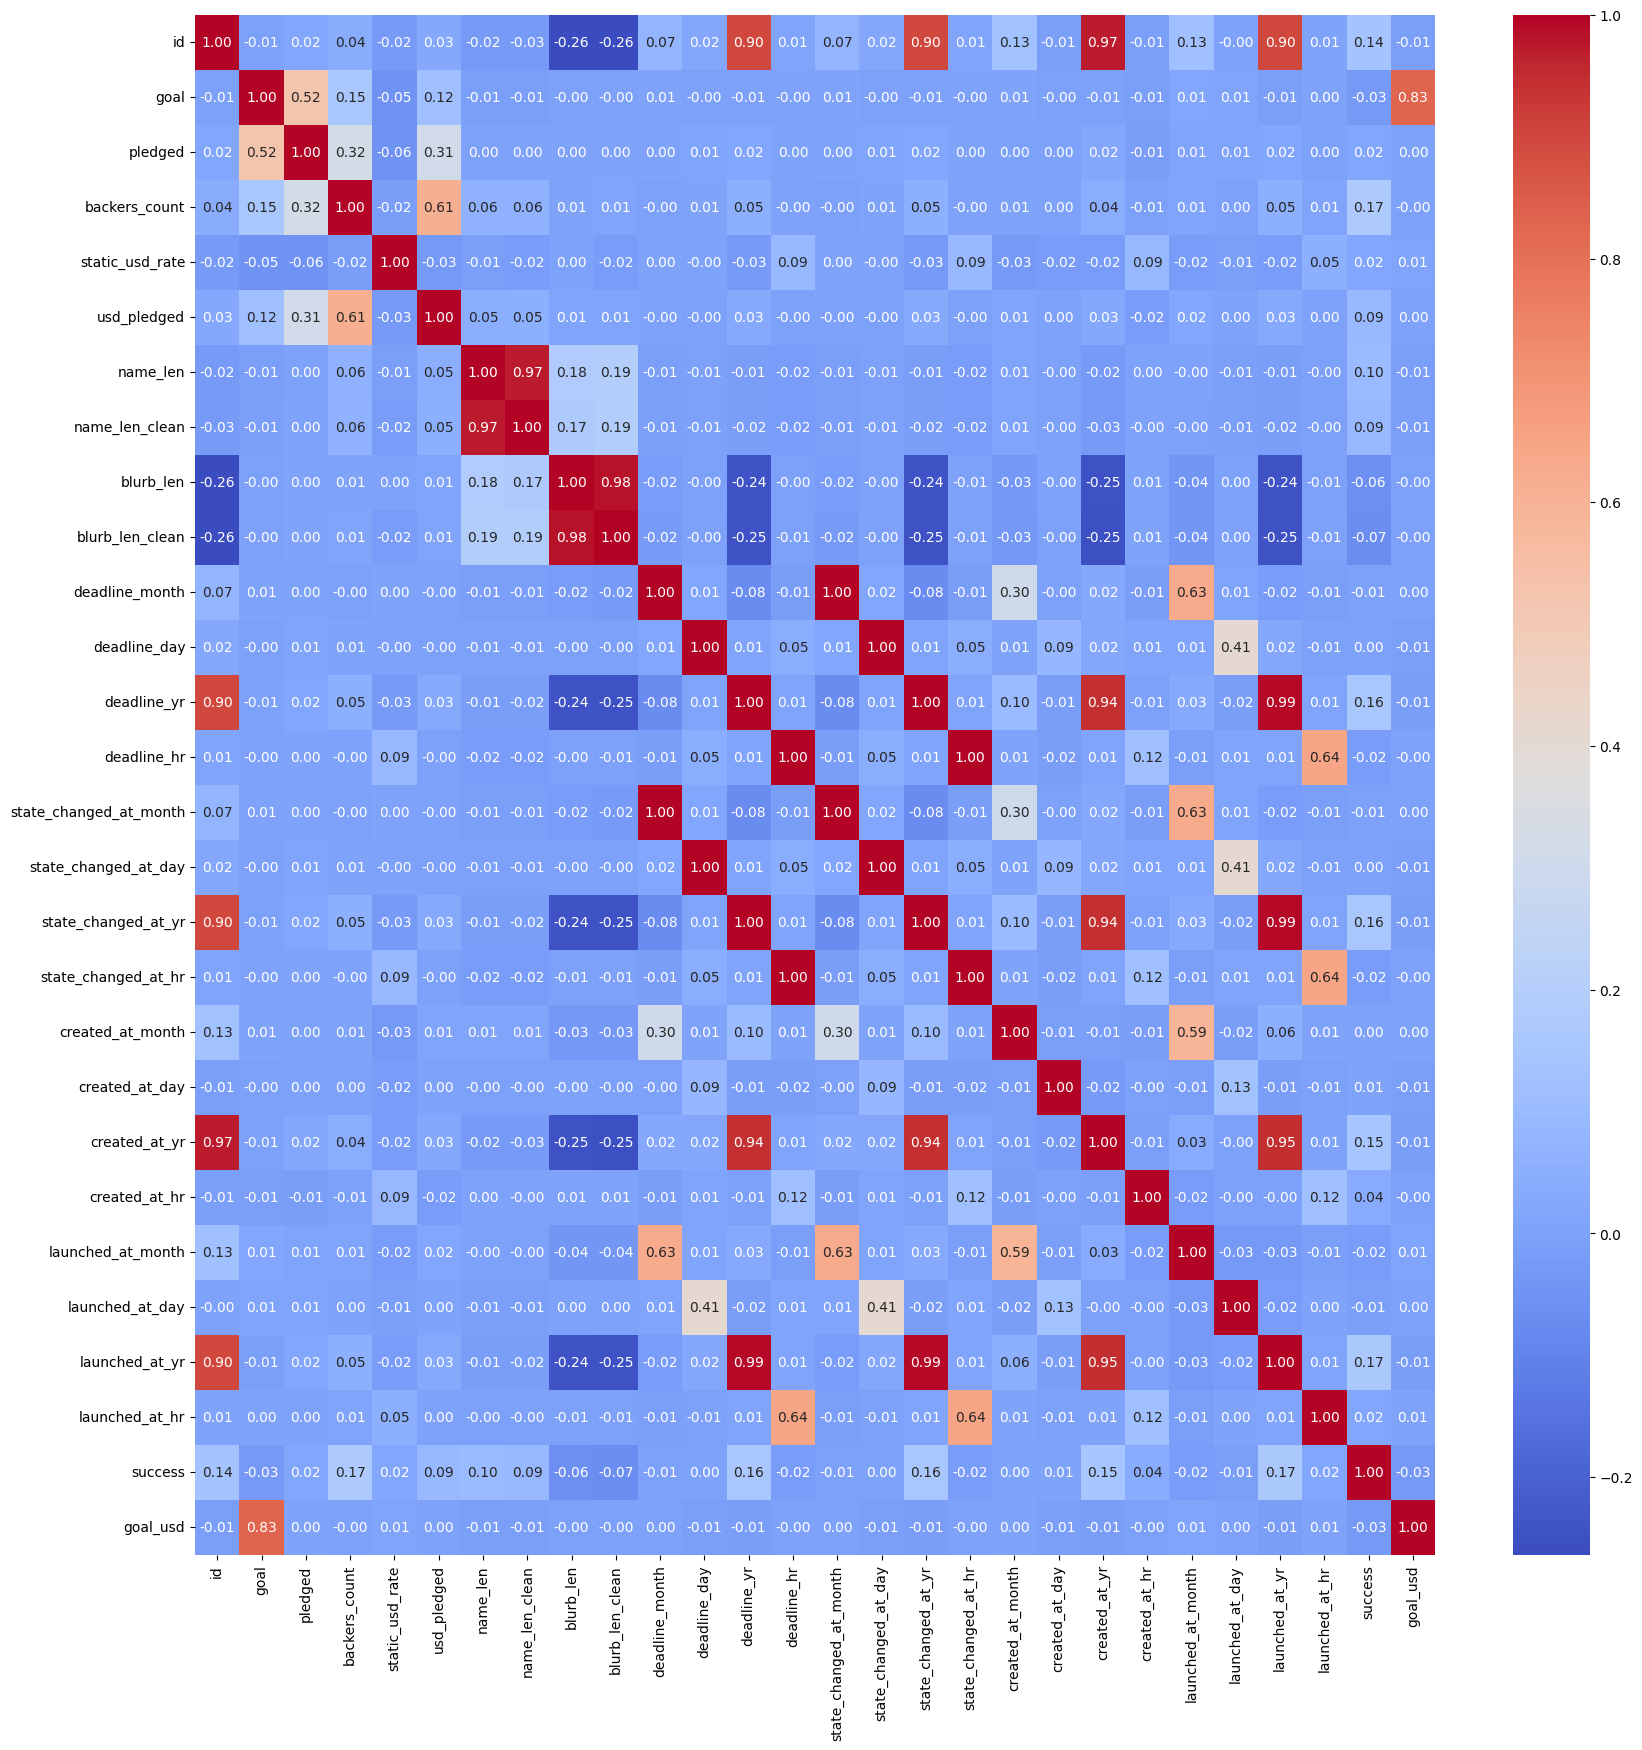

In [45]:
#print the correlation matrix
correlation_matrix = numerical_data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")

Remove the state changed at variables since they are the same as the deadline variables. 

In addition create a new variable corresponding to the amount of days between the launch date and the deadline. Examine its relationship with sucess and the goal variable. 
.
Create another variable for the amount of time between the creation and the launch.

In [55]:
#remove the variables corresponding to state_changed_at
data = data[data.columns.drop(list(data.filter(regex = 'state_changed_at')))]

#create a new varaible corresponding to the number of days between the lauch date and the deadline
data['pledge_period'] = (data['deadline'] - data['launched_at']).dt.days

#new variable for the time between the creation of the project and the launch
data['launch_period'] = (data['launched_at'] - data['created_at']).dt.days

#new variable for the average amount pledged per day for a successful project
data['avg_pledge_per_day'] = data['goal_usd'] / data['pledge_period']

#get descriptive statistics for the new variables
data[['pledge_period', 'launch_period', 'avg_pledge_per_day']].describe()

,pledge_period,launch_period,avg_pledge_per_day
count,14463.000000,14463.000000,1.446300e+04
mean,33.661066,65.313766,1.149467e+03
std,12.971604,205.060514,2.994506e+04
min,1.000000,0.000000,1.311017e-02
25%,29.000000,4.000000,4.484121e+01
50%,30.000000,13.000000,1.500000e+02
75%,37.000000,44.000000,4.062915e+02
max,120.000000,3899.000000,2.538462e+06


<Axes: >

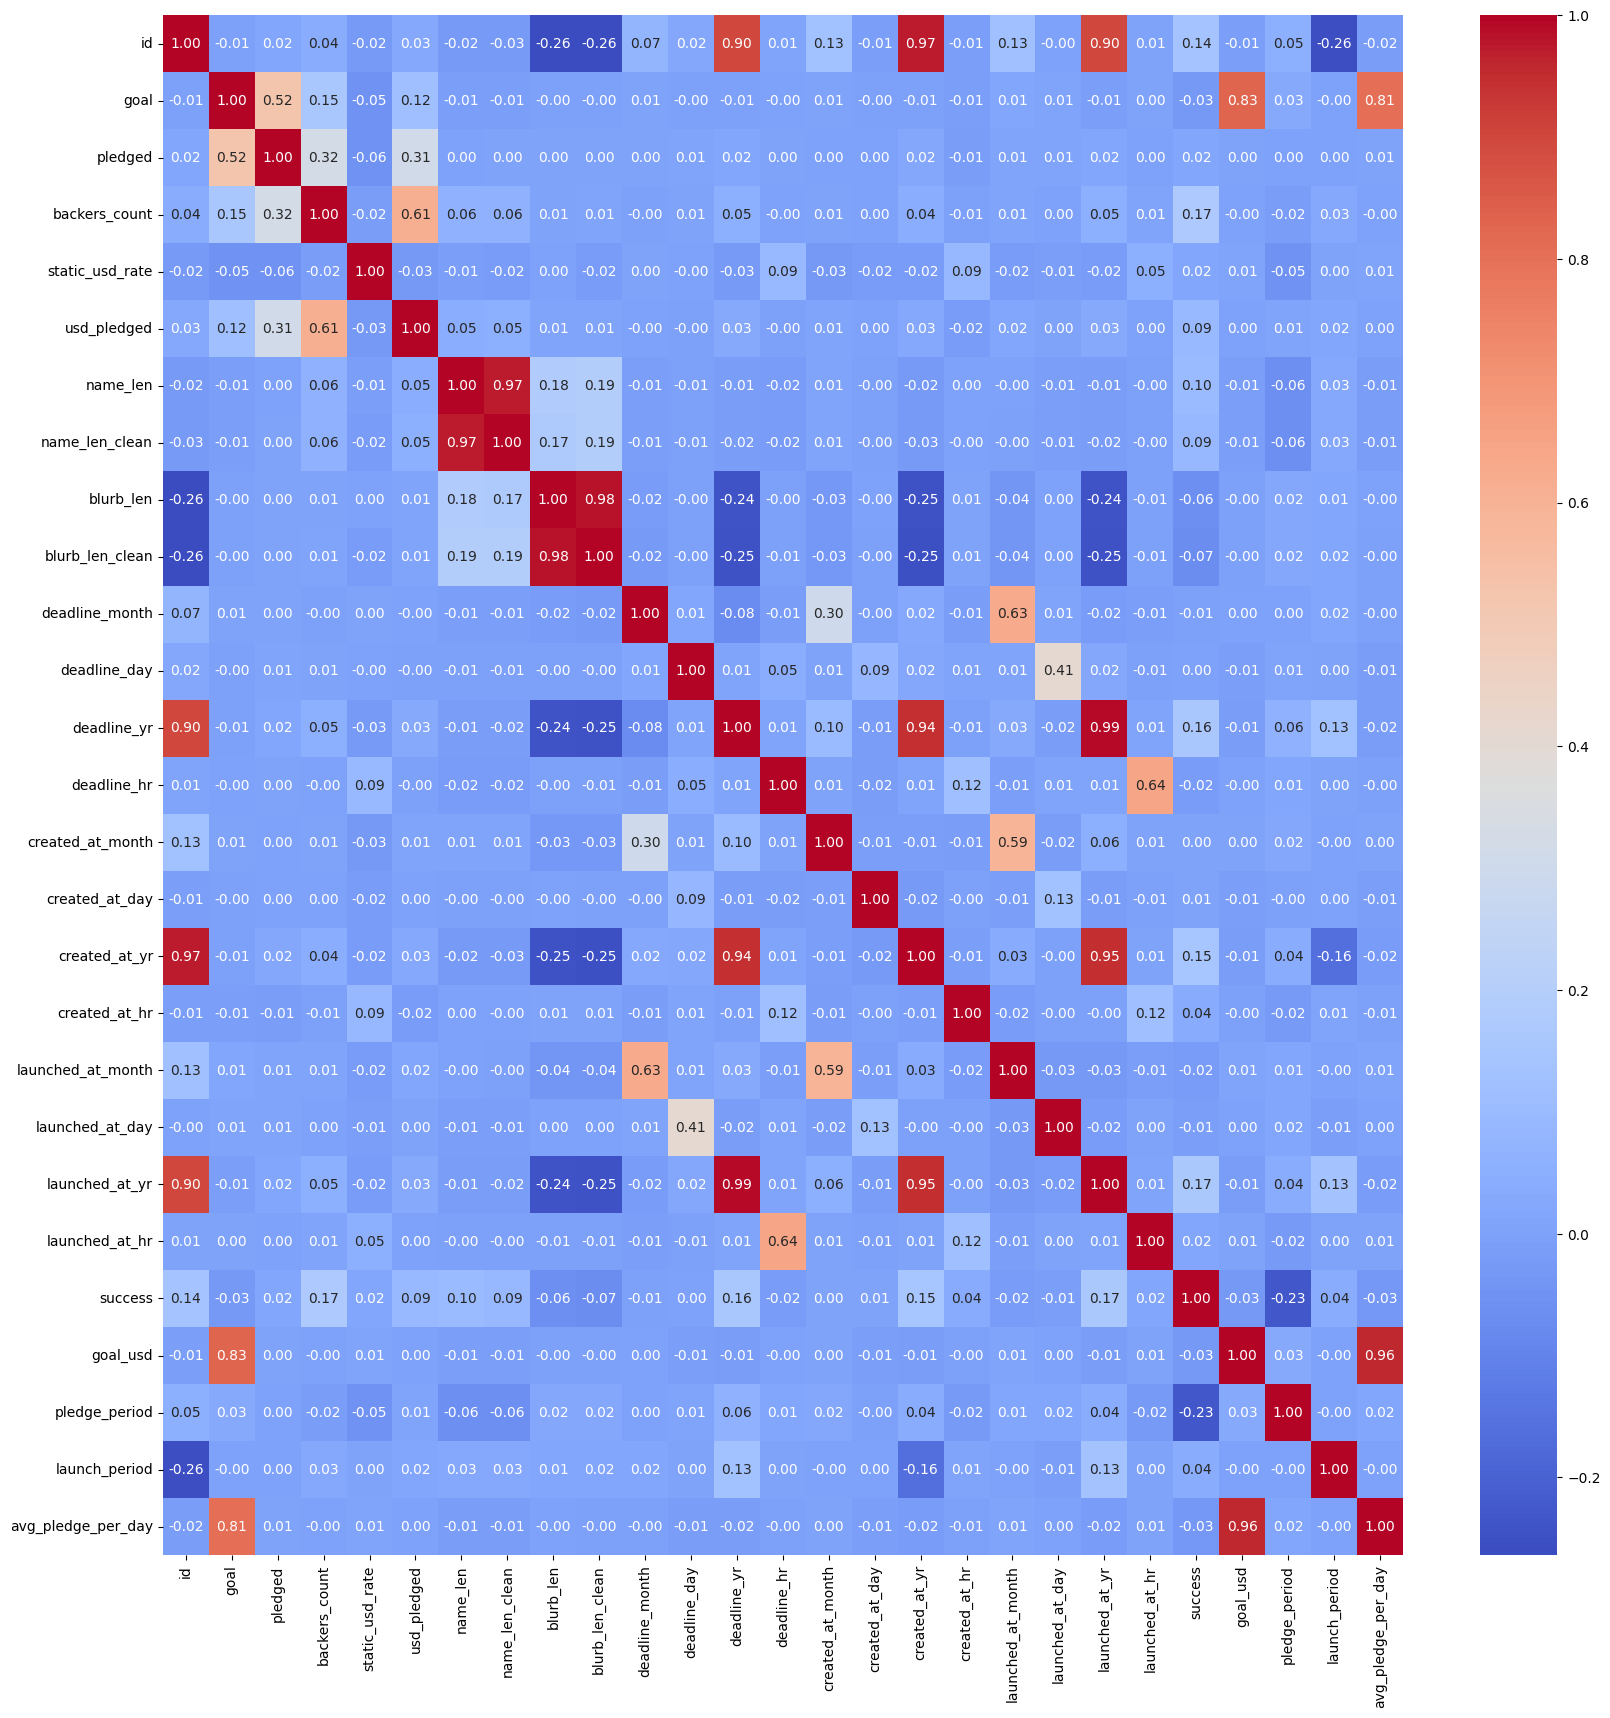

In [56]:
#get the correlation of the new variables with the numeric variables
numerical_data = data.select_dtypes(include = [np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")

Inspect the distribution of the main numerical variables

In [58]:
#decriptive statistics for the main variables
data[['goal', 'goal_usd', 'name_len', 'name_len_clean', 'blurb_len','blurb_len_clean', 'deadline_yr', 'deadline_month', 'pledge_period', 'avg_pledge_per_day']].describe()

,goal,goal_usd,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_yr,deadline_month,pledge_period,avg_pledge_per_day
count,1.446300e+04,1.446300e+04,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,1.446300e+04
mean,6.917525e+04,4.523772e+04,5.375786,5.004356,16.312176,14.975731,2019.583005,6.591855,33.661066,1.149467e+03
std,1.601474e+06,1.435961e+06,2.459302,2.280234,5.866888,5.456764,1.903278,3.387704,12.971604,2.994506e+04
min,1.000000e+00,7.603898e-01,1.000000,1.000000,1.000000,1.000000,2017.000000,1.000000,1.000000,1.311017e-02
25%,1.500000e+03,1.301362e+03,3.000000,3.000000,12.000000,11.000000,2018.000000,4.000000,29.000000,4.484121e+01
50%,5.000000e+03,5.000000e+03,5.000000,5.000000,17.000000,16.000000,2020.000000,6.000000,30.000000,1.500000e+02
75%,1.500000e+04,1.279244e+04,7.000000,7.000000,21.000000,19.000000,2021.000000,10.000000,37.000000,4.062915e+02
max,1.000000e+08,1.182690e+08,16.000000,14.000000,31.000000,28.000000,2024.000000,12.000000,120.000000,2.538462e+06


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\2526336957.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['goal_usd'], kde = False, bins = 100)


Text(0, 0.5, 'Frequency')

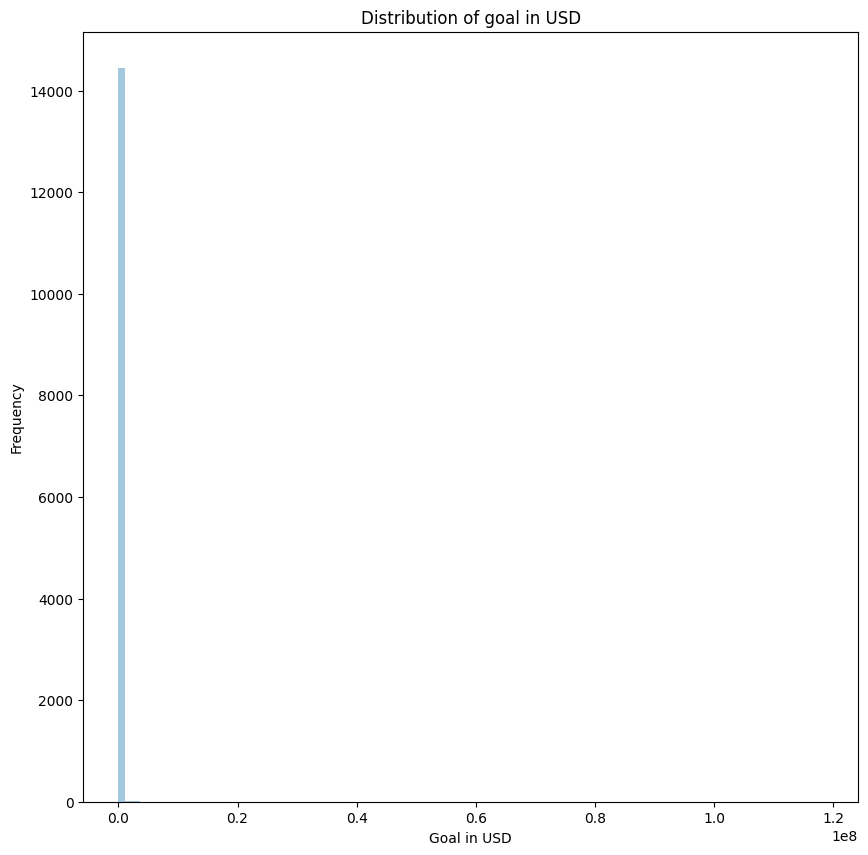

In [57]:
#get the distribution of goal
plt.figure(figsize = (10, 10))
sns.distplot(data['goal_usd'], kde = False, bins = 100)
plt.title('Distribution of goal in USD')
plt.xlabel('Goal in USD')
plt.ylabel('Frequency')


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\1769293470.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['goal_usd_log'], kde = False, bins = 50)


Text(0, 0.5, 'Frequency')

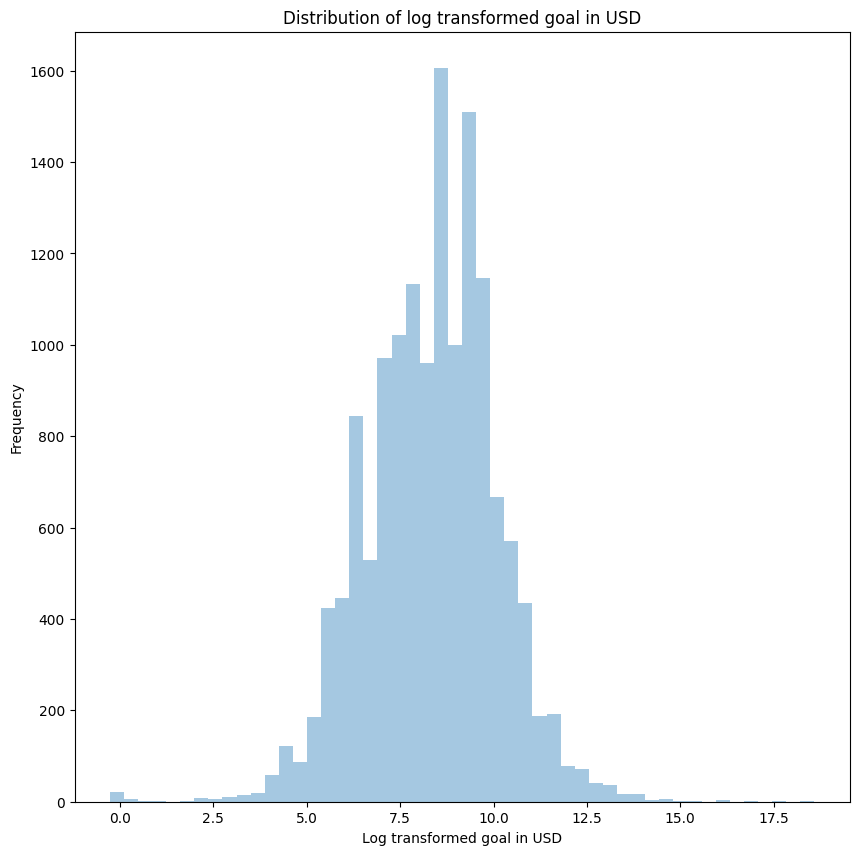

In [65]:
#correct for skewness with log transformation
data['goal_usd_log'] = np.log(data['goal_usd'])

#plot the distribution of the log transformed goal
plt.figure(figsize = (10, 10))
sns.distplot(data['goal_usd_log'], kde = False, bins = 50)
plt.title('Distribution of log transformed goal in USD')
plt.xlabel('Log transformed goal in USD')
plt.ylabel('Frequency')


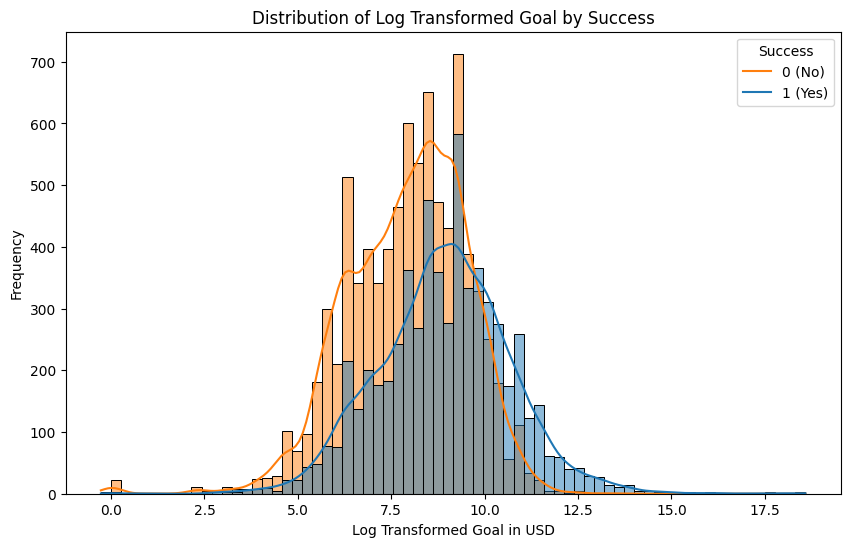

In [78]:
#create a barplot of the log transformed goal by success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="goal_usd_log", hue="success", multiple="layer", bins=70, kde=True)
plt.title("Distribution of Log Transformed Goal by Success")
plt.xlabel("Log Transformed Goal in USD")
plt.ylabel("Frequency")
plt.legend(title="Success", labels=["0 (No)", "1 (Yes)"])
plt.show()


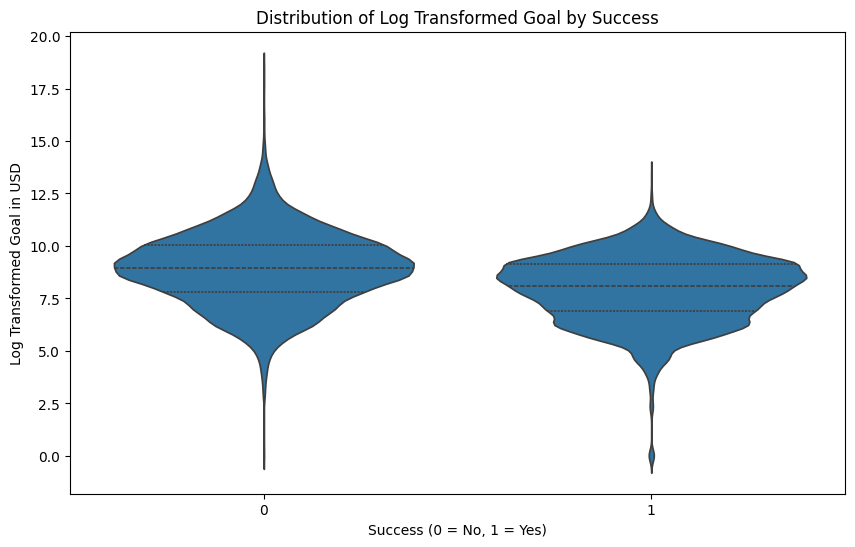

In [69]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x="success", y="goal_usd_log", inner="quartile")
plt.title("Distribution of Log Transformed Goal by Success")
plt.xlabel("Success (0 = No, 1 = Yes)")
plt.ylabel("Log Transformed Goal in USD")
plt.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\2315182737.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['name_len_clean'], kde = False, bins = 14)


Text(0, 0.5, 'Frequency')

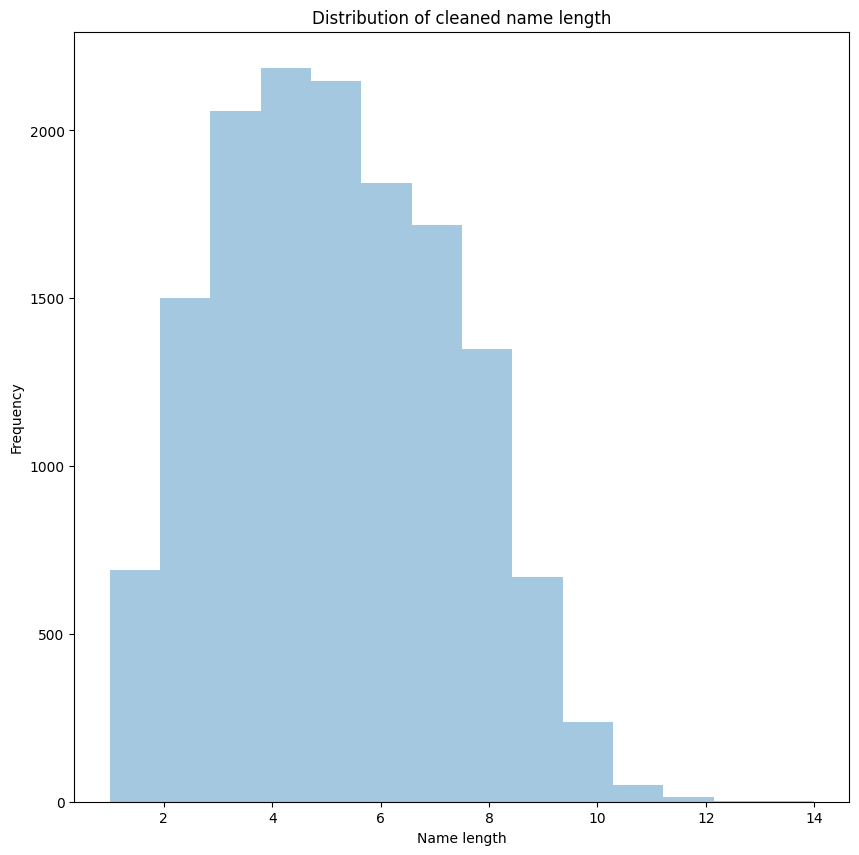

In [72]:
#get the distribution of the name length
plt.figure(figsize = (10, 10))
sns.distplot(data['name_len_clean'], kde = False, bins = 14)
plt.title('Distribution of cleaned name length')
plt.xlabel('Name length')
plt.ylabel('Frequency')


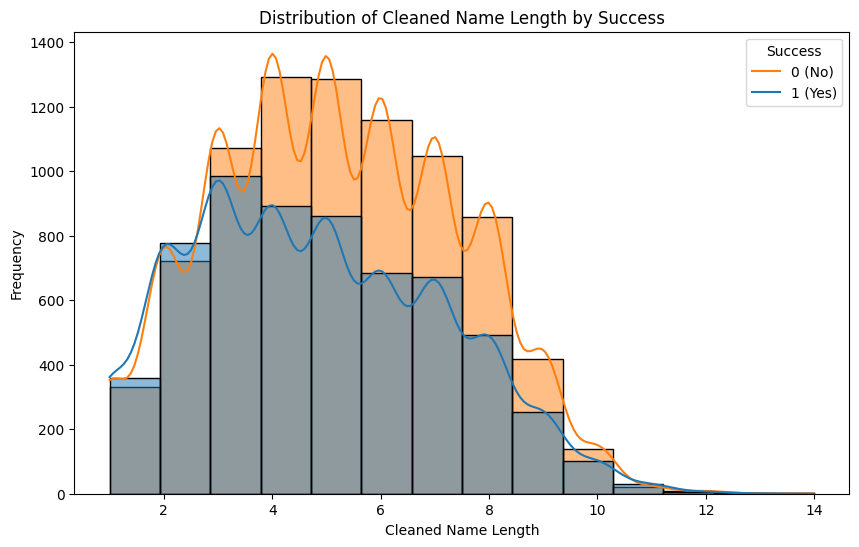

In [79]:
#get the distribution in respect to success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="name_len_clean", hue="success", multiple="layer", bins=14, kde=True)
plt.title("Distribution of Cleaned Name Length by Success")
plt.xlabel("Cleaned Name Length")
plt.ylabel("Frequency")
plt.legend(title="Success", labels=["0 (No)", "1 (Yes)"])


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\1513641011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['blurb_len_clean'], kde = False, bins = 28)


Text(0, 0.5, 'Frequency')

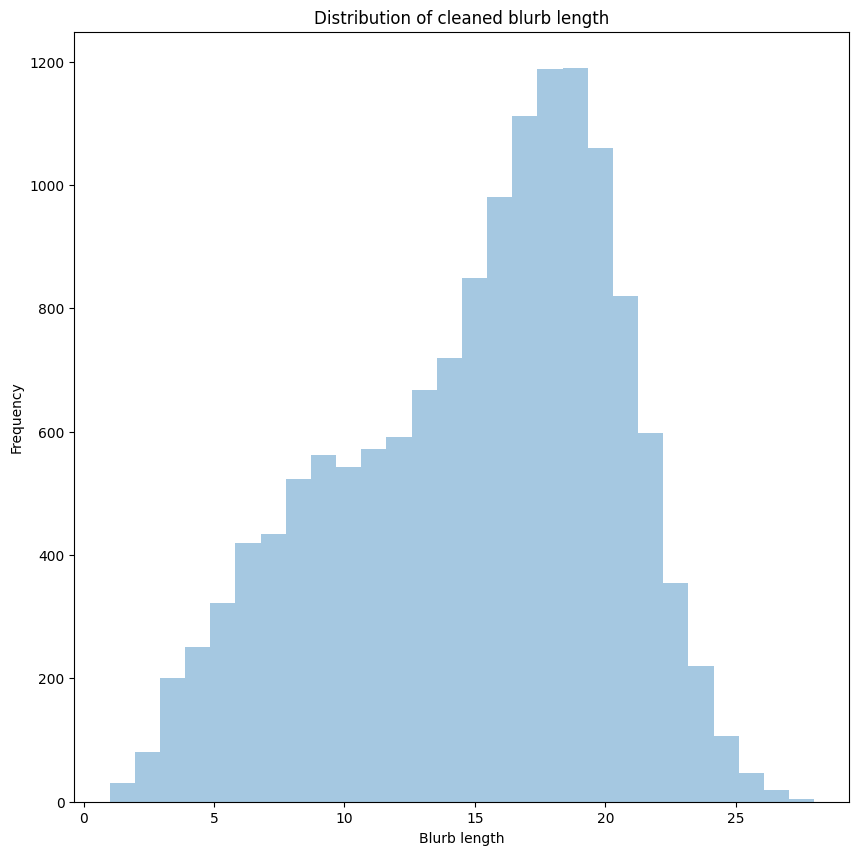

In [81]:
#get the distribution of the blurb length
plt.figure(figsize = (10, 10))
sns.distplot(data['blurb_len_clean'], kde = False, bins = 28)
plt.title('Distribution of cleaned blurb length')
plt.xlabel('Blurb length')
plt.ylabel('Frequency')


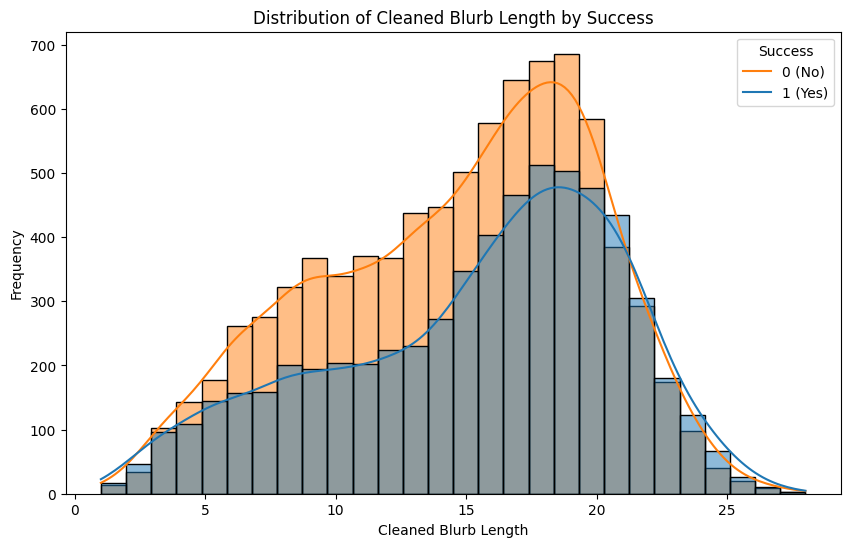

In [82]:
#get the distribution in respect to success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="blurb_len_clean", hue="success", multiple="layer", bins=28, kde=True)
plt.title("Distribution of Cleaned Blurb Length by Success")
plt.xlabel("Cleaned Blurb Length")
plt.ylabel("Frequency")
plt.legend(title="Success", labels=["0 (No)", "1 (Yes)"])

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\1274697921.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['deadline_yr'], kde = False, bins = 7)


Text(0, 0.5, 'Frequency')

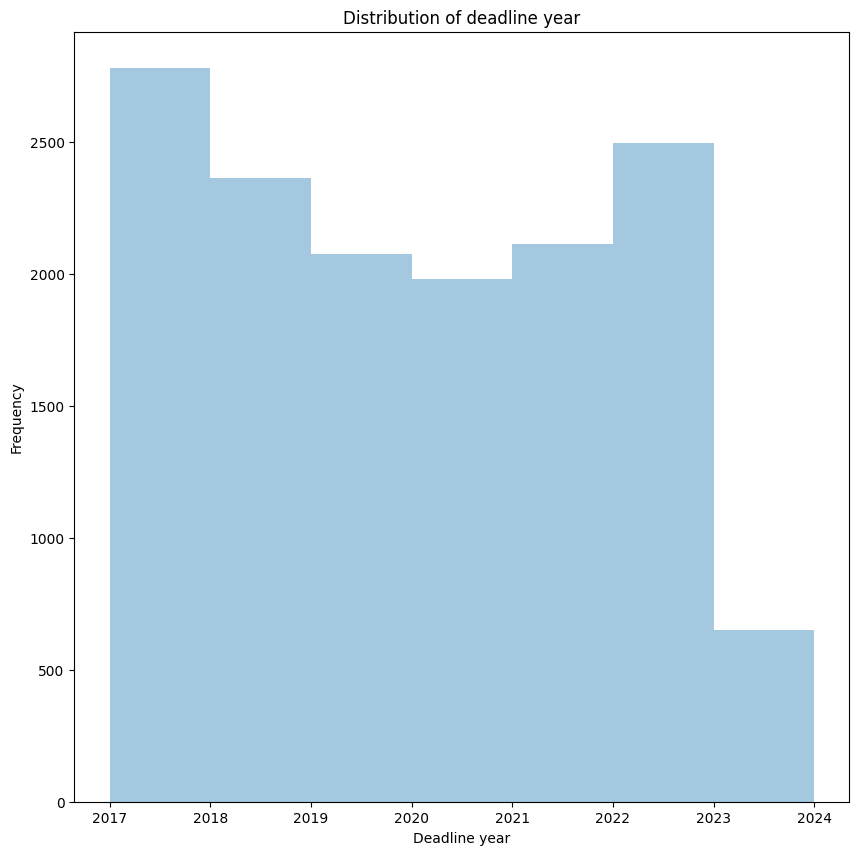

In [86]:
#plot the distribution of the deadline year
plt.figure(figsize = (10, 10))
sns.distplot(data['deadline_yr'], kde = False, bins = 7)
plt.title('Distribution of deadline year')
plt.xlabel('Deadline year')
plt.ylabel('Frequency')


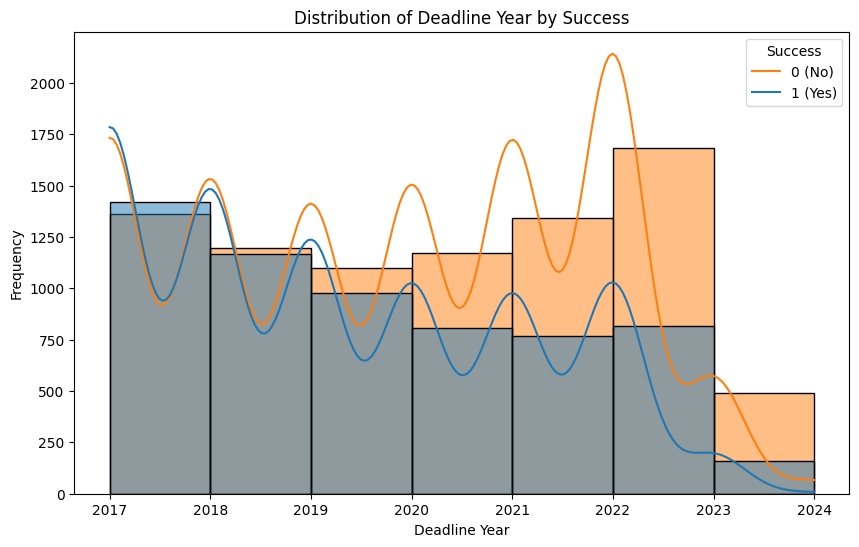

In [87]:
#get the distribution in respect to success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="deadline_yr", hue="success", multiple="layer", bins=7, kde=True)
plt.title("Distribution of Deadline Year by Success")
plt.xlabel("Deadline Year")
plt.ylabel("Frequency")
plt.legend(title="Success", labels=["0 (No)", "1 (Yes)"])

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\1205865302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['deadline_month'], kde = False, bins = 12)


Text(0, 0.5, 'Frequency')

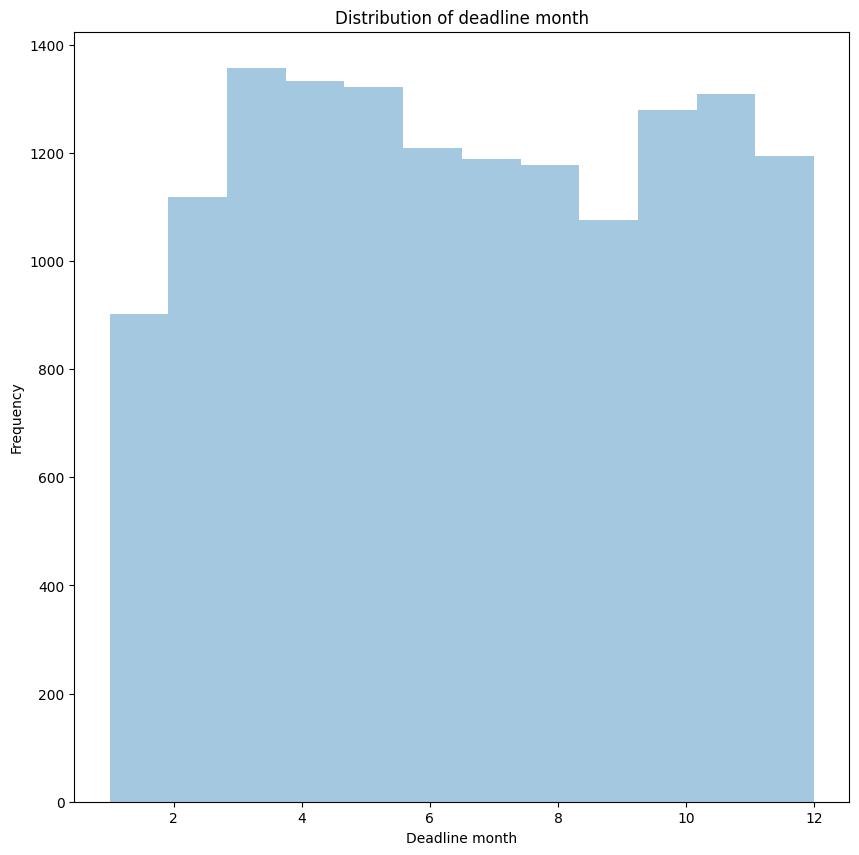

In [88]:
#plot the distribution of the deadline month
plt.figure(figsize = (10, 10))
sns.distplot(data['deadline_month'], kde = False, bins = 12)
plt.title('Distribution of deadline month')
plt.xlabel('Deadline month')
plt.ylabel('Frequency')


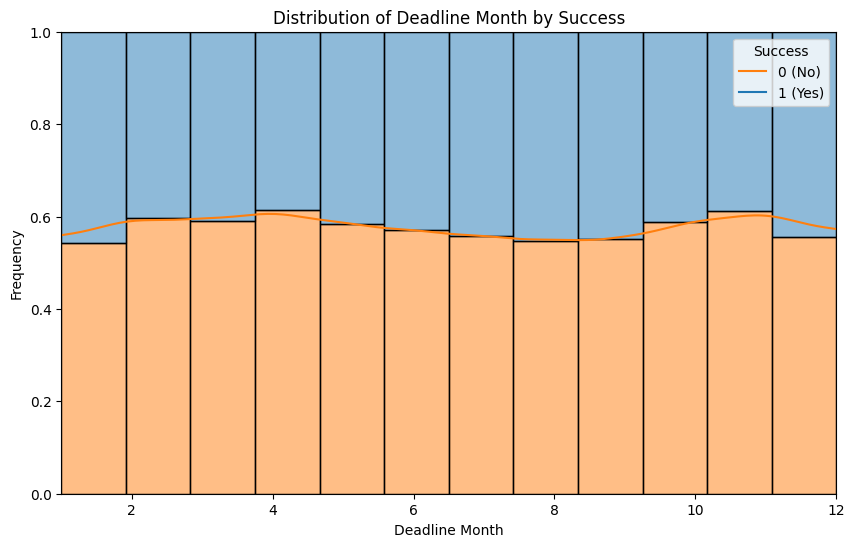

In [92]:
#get the distribution in respect to success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="deadline_month", hue="success", multiple="fill", bins=12, kde=True)
plt.title("Distribution of Deadline Month by Success")
plt.xlabel("Deadline Month")
plt.ylabel("Frequency")
plt.legend(title="Success", labels=["0 (No)", "1 (Yes)"])

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\1784480224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pledge_period'], kde = False, bins = 30)


Text(0, 0.5, 'Frequency')

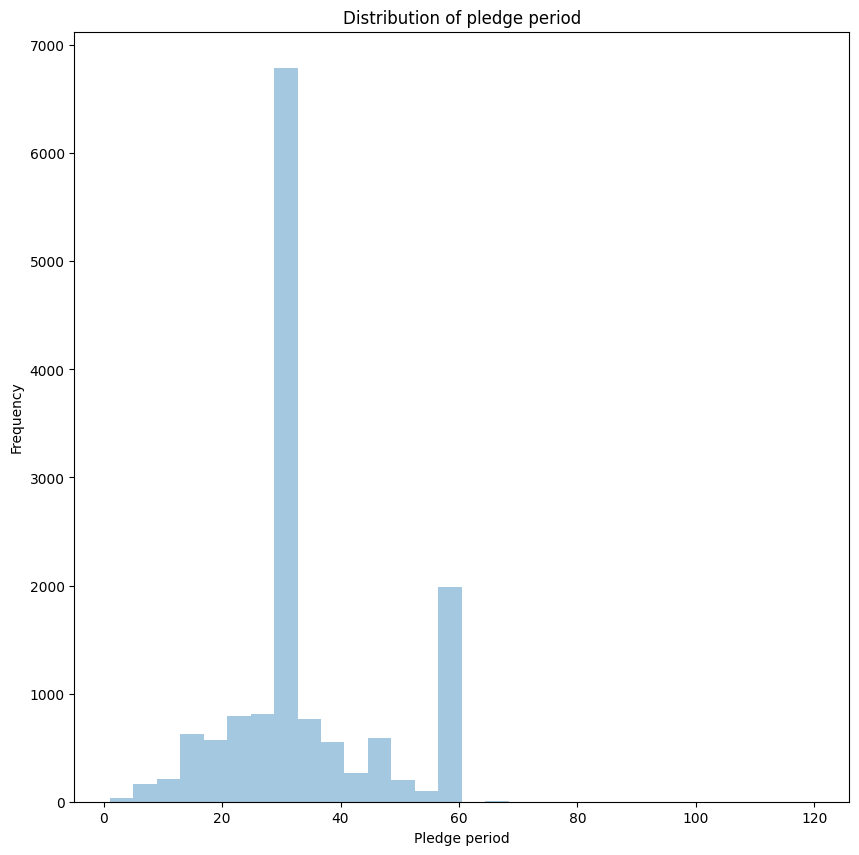

In [94]:
#plot the distribution of the pledge period
plt.figure(figsize = (10, 10))
sns.distplot(data['pledge_period'], kde = False, bins = 30)
plt.title('Distribution of pledge period')
plt.xlabel('Pledge period')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

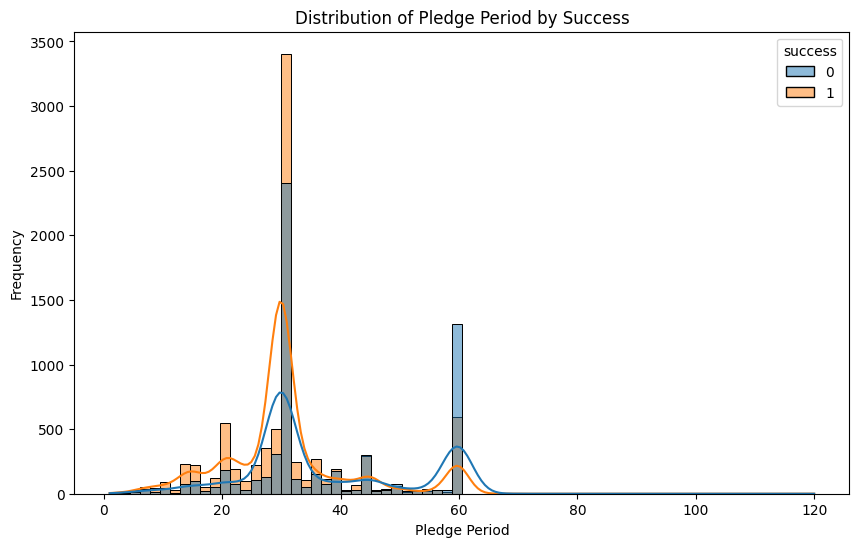

In [96]:
#get the distribution in respect to success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="pledge_period", hue="success", multiple="layer", bins=70, kde=True)
plt.title("Distribution of Pledge Period by Success")
plt.xlabel("Pledge Period")
plt.ylabel("Frequency")

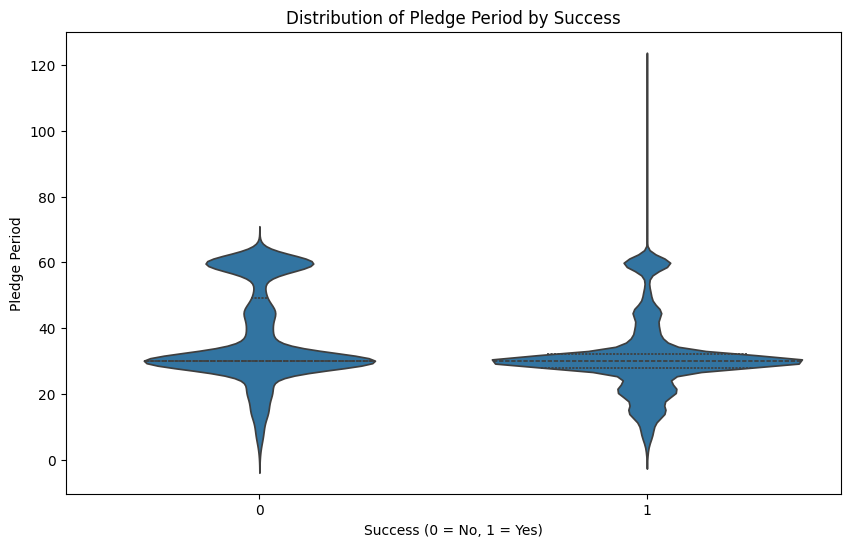

In [97]:
#use a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x="success", y="pledge_period", inner="quartile")
plt.title("Distribution of Pledge Period by Success")
plt.xlabel("Success (0 = No, 1 = Yes)")
plt.ylabel("Pledge Period")
plt.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\3389477496.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['avg_pledge_per_day'], kde = False, bins = 100)


Text(0, 0.5, 'Frequency')

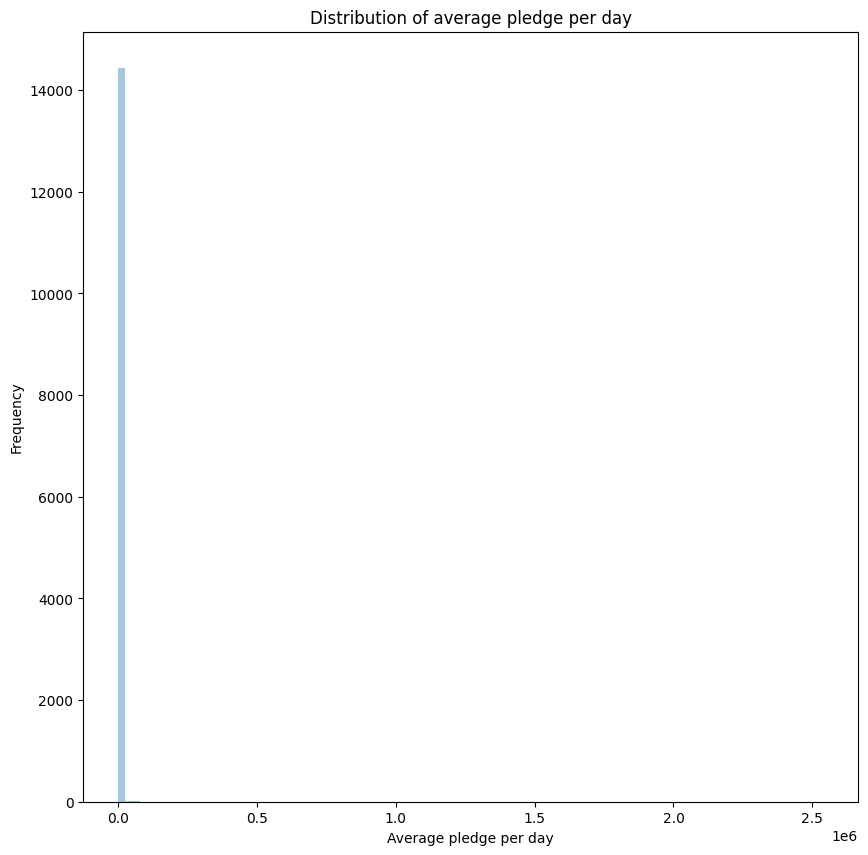

In [98]:
#plot the distribution of the average pledge per day
plt.figure(figsize = (10, 10))
sns.distplot(data['avg_pledge_per_day'], kde = False, bins = 100)
plt.title('Distribution of average pledge per day')
plt.xlabel('Average pledge per day')
plt.ylabel('Frequency')


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\1629651304.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['avg_pledge_per_day_log'], kde = False, bins = 100)


Text(0, 0.5, 'Frequency')

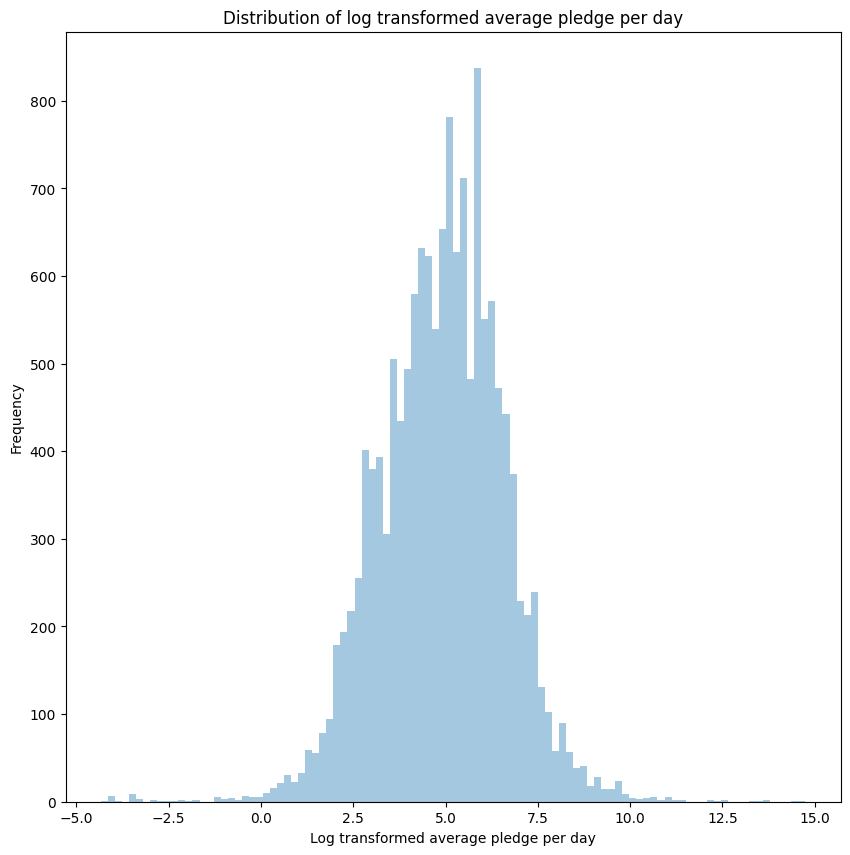

In [99]:
#correct for skewness with log transformation
data['avg_pledge_per_day_log'] = np.log(data['avg_pledge_per_day'])

#plot the distribution of the log transformed average pledge per day
plt.figure(figsize = (10, 10))
sns.distplot(data['avg_pledge_per_day_log'], kde = False, bins = 100)
plt.title('Distribution of log transformed average pledge per day')
plt.xlabel('Log transformed average pledge per day')
plt.ylabel('Frequency')


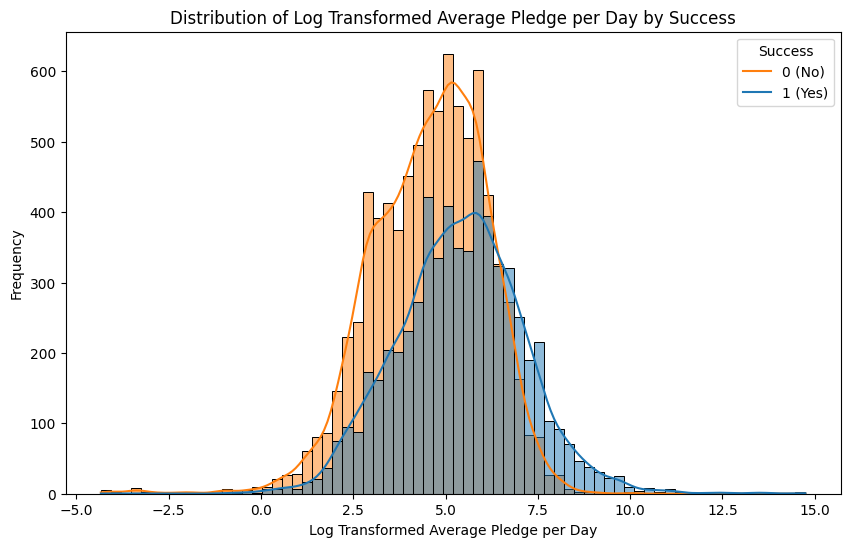

In [100]:
#create a barplot of the log transformed average pledge per day by success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="avg_pledge_per_day_log", hue="success", multiple="layer", bins=70, kde=True)
plt.title("Distribution of Log Transformed Average Pledge per Day by Success")
plt.xlabel("Log Transformed Average Pledge per Day")
plt.ylabel("Frequency")
plt.legend(title="Success", labels=["0 (No)", "1 (Yes)"])

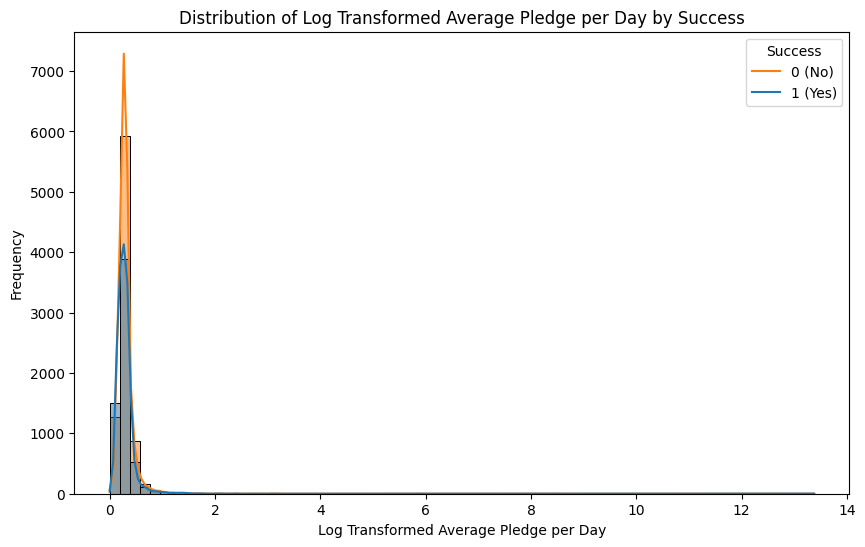

In [164]:
#have a new variable that is the log transformed average pledge per day
data['avg_pledge_log_per_day'] =data['goal_usd_log'] / data['pledge_period']

#create a barplot of the log transformed average pledge per day by success
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="avg_pledge_log_per_day", hue="success", multiple="layer", bins=70, kde=True)
plt.title("Distribution of Log Transformed Average Pledge per Day by Success")
plt.xlabel("Log Transformed Average Pledge per Day")
plt.ylabel("Frequency")
plt.legend(title="Success", labels=["0 (No)", "1 (Yes)"])

Now we will take a look at the categorical variables of the dataset:


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Film & Video'),
  Text(1, 0, 'Fashion'),
  Text(2, 0, 'Music'),
  Text(3, 0, 'Journalism'),
  Text(4, 0, 'Technology'),
  Text(5, 0, 'Design'),
  Text(6, 0, 'Publishing'),
  Text(7, 0, 'Theater'),
  Text(8, 0, 'Games'),
  Text(9, 0, 'Food'),
  Text(10, 0, 'Art'),
  Text(11, 0, 'Crafts'),
  Text(12, 0, 'Comics'),
  Text(13, 0, 'Photography'),
  Text(14, 0, 'Dance')])

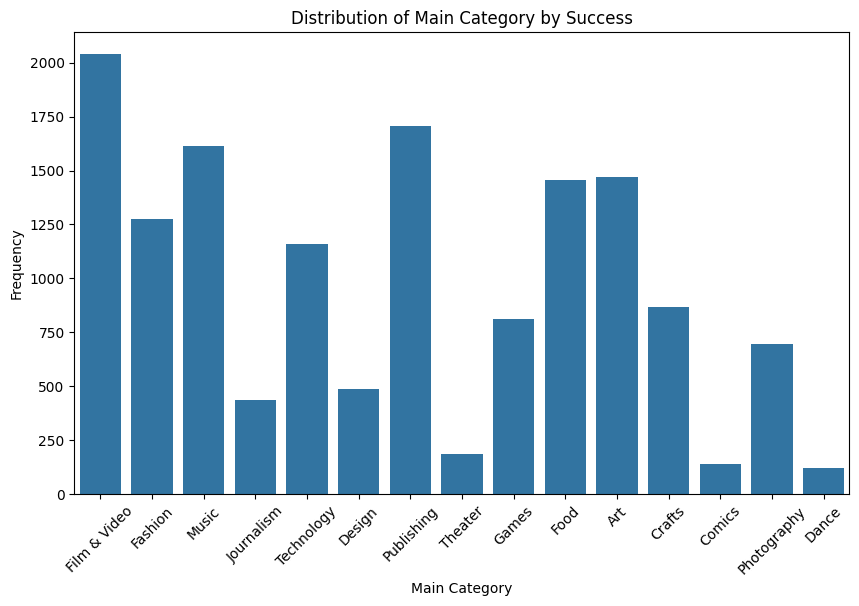

In [109]:
#create a plot of the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="main_category")
plt.title("Distribution of Main Category by Success")
plt.xlabel("Main Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

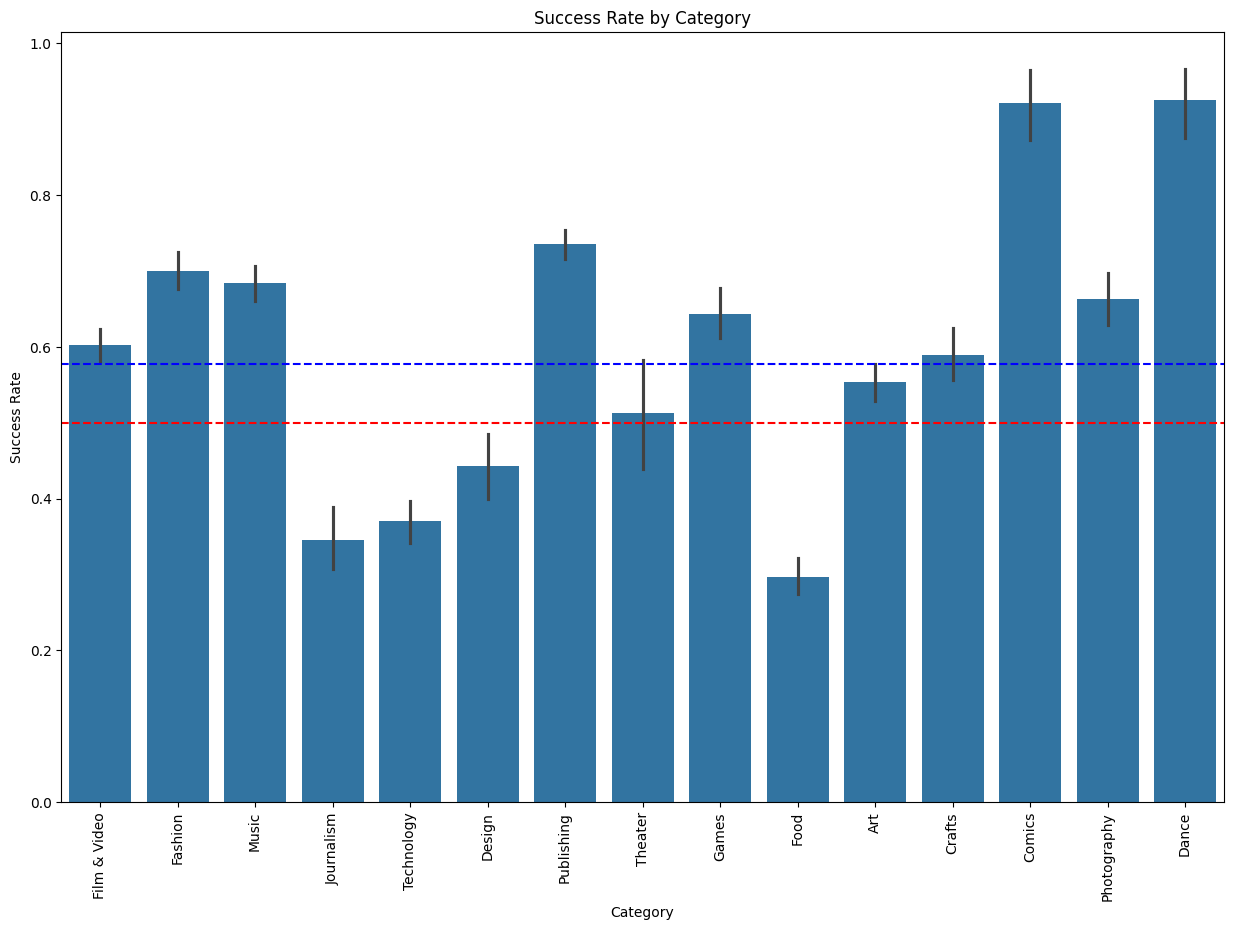

In [110]:
#create a barplot of the success rate by category
plt.figure(figsize=(15, 10))
sns.barplot(data=data, x="main_category", y="success")
plt.title("Success Rate by Category")
plt.xlabel("Category")
plt.ylabel("Success Rate")
plt.xticks(rotation=90)

#add two lines one for .5 success and one for the average success rate
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=data['success'].mean(), color='b', linestyle='--')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'ES'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'NL'),
  Text(7, 0, 'DE'),
  Text(8, 0, 'SE'),
  Text(9, 0, 'FR'),
  Text(10, 0, 'AU'),
  Text(11, 0, 'MX'),
  Text(12, 0, 'HK'),
  Text(13, 0, 'JP')])

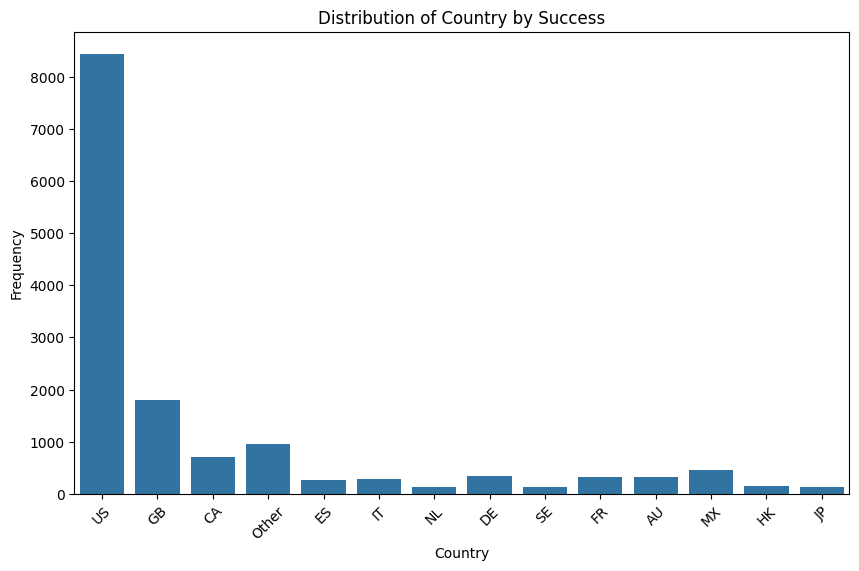

In [147]:
#create a plot of the distribution of countries

#select only the countries with at least 100 projects
countries = data['country'].value_counts()
countries = countries[countries > 100].index
#create a plot with an other category for the countries with less than 100 projects
data['other_country'] = np.where(data['country'].isin(countries), data['country'], 'Other')
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="other_country")
plt.title("Distribution of Country by Success")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.xticks(rotation=45)



In [114]:
print(data["country"].value_counts())

country
US    8435
GB    1801
CA     705
MX     451
DE     349
      ... 
LV       1
ML       1
QA       1
TV       1
SD       1
Name: count, Length: 115, dtype: int64


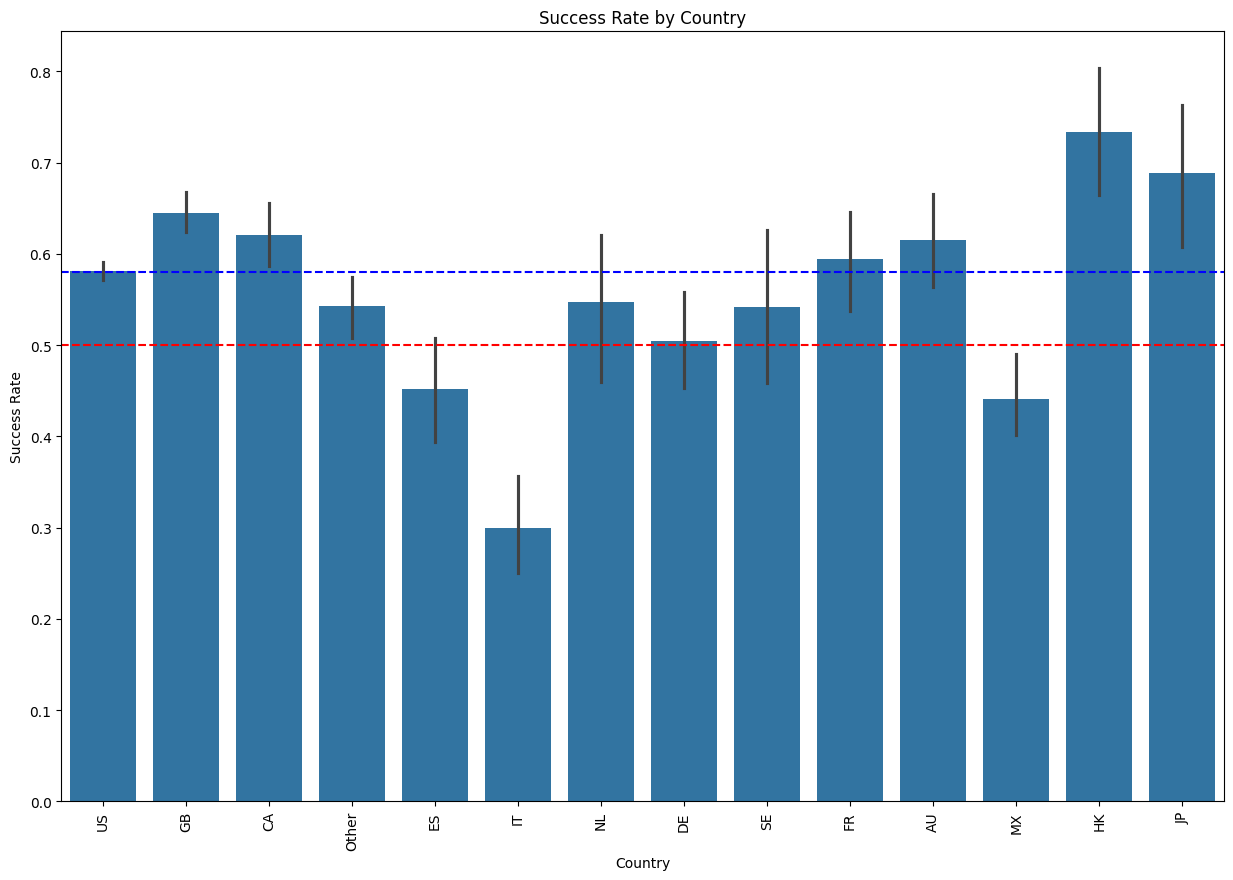

In [146]:
#create a barplot of the success rate of these countries
plt.figure(figsize=(15, 10))
sns.barplot(data=data, x="other_country", y="success")
plt.title("Success Rate by Country")
plt.xlabel("Country")
plt.ylabel("Success Rate")
plt.xticks(rotation=90)

#add two lines one for .5 success and one for the average success rate of the included countries
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=data[data['country'].isin(countries)]['success'].mean(), color='b', linestyle='--') #doesn't seem to change because of the majority of US projects

Text(0, 0.5, 'Frequency')

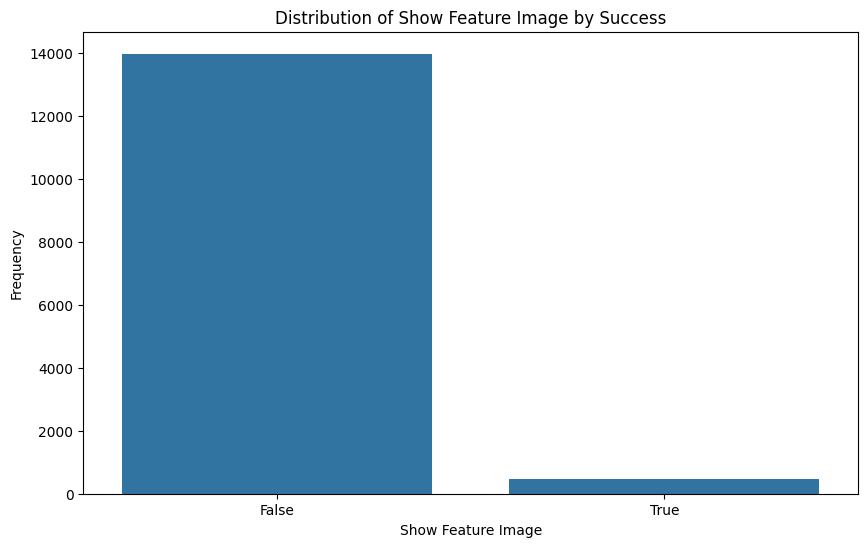

In [124]:
#create a plot of the distribution of show feature image
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="show_feature_image")
plt.title("Distribution of Show Feature Image")
plt.xlabel("Show Feature Image")
plt.ylabel("Frequency")


Text(0, 0.5, 'Success Rate')

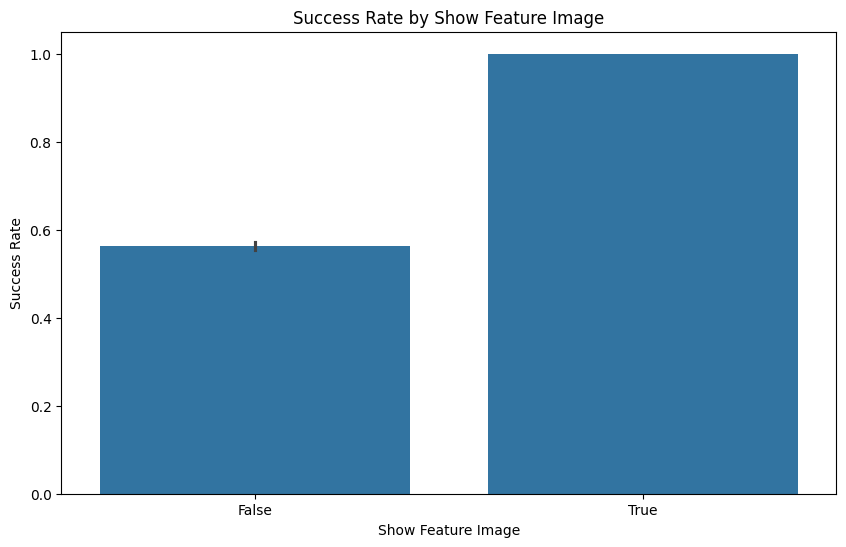

In [125]:
#create a barplot of the success rate by show feature image
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="show_feature_image", y="success")
plt.title("Success Rate by Show Feature Image")
plt.xlabel("Show Feature Image")
plt.ylabel("Success Rate")

Text(0.5, 0, 'Video')

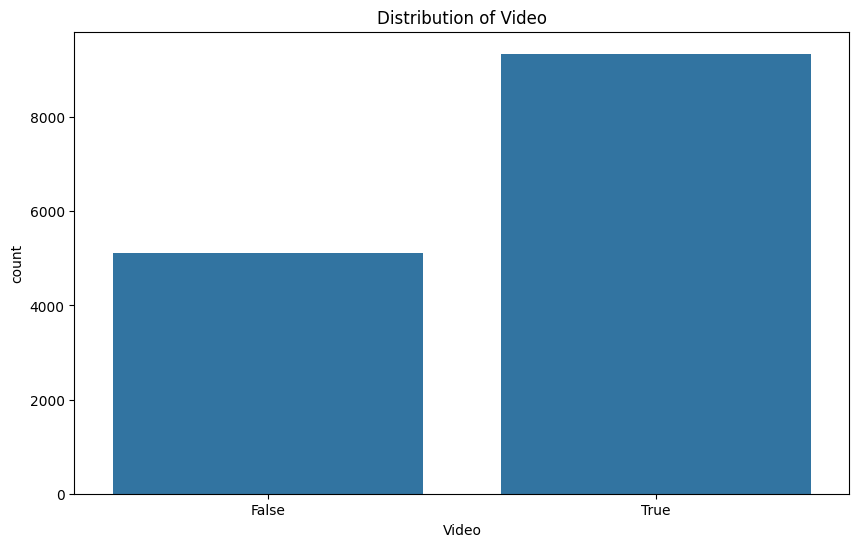

In [126]:
#create a plot of the distribution of video
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="video")
plt.title("Distribution of Video")
plt.xlabel("Video")

Text(0, 0.5, 'Success Rate')

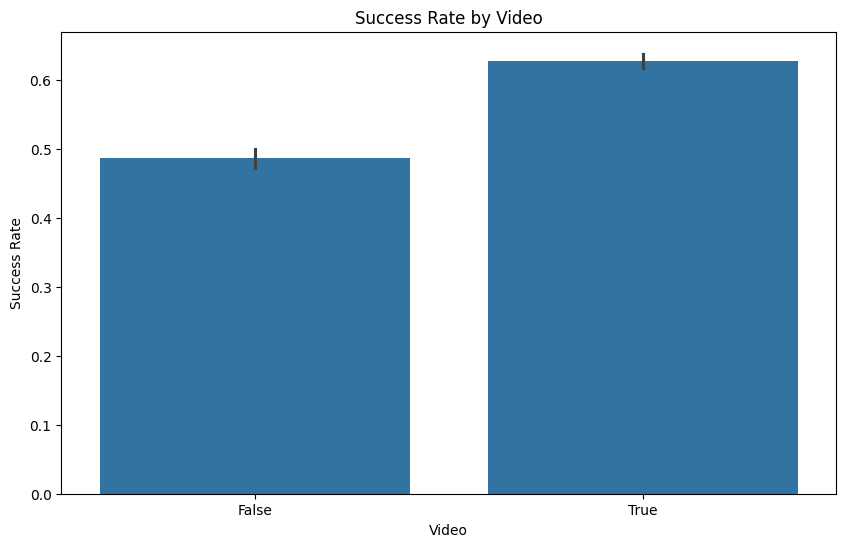

In [127]:
#create a barplot of the success rate by video
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="video", y="success")
plt.title("Success Rate by Video")
plt.xlabel("Video")
plt.ylabel("Success Rate")


Text(0, 0.5, 'Frequency')

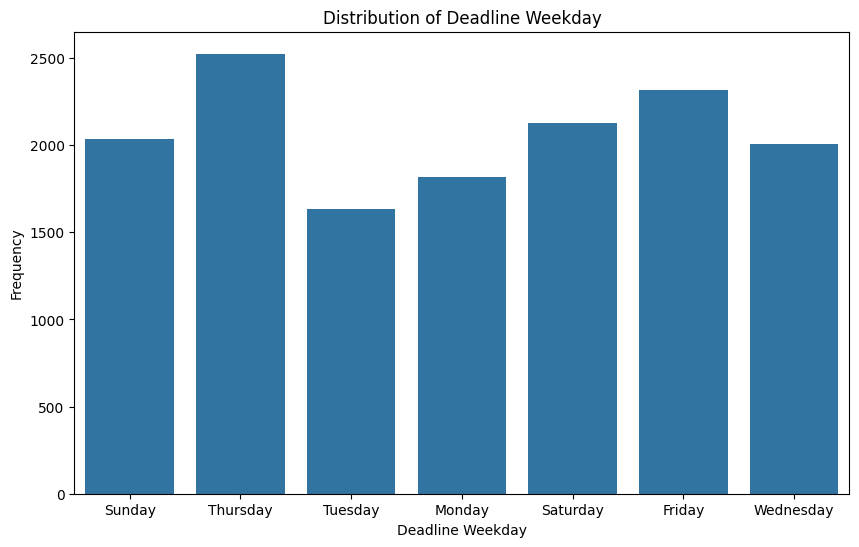

In [128]:
#create a plot of the distribution of deadline weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="deadline_weekday")
plt.title("Distribution of Deadline Weekday")
plt.xlabel("Deadline Weekday")
plt.ylabel("Frequency")


Text(0, 0.5, 'Success Rate')

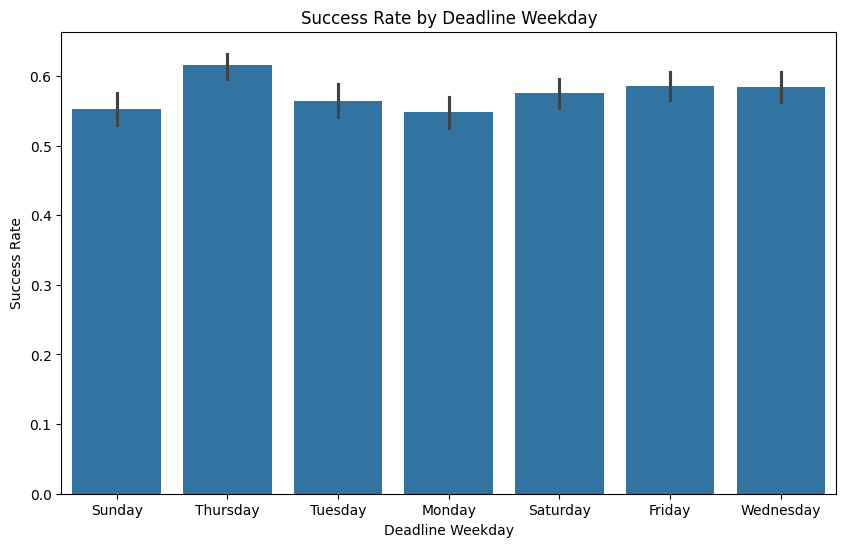

In [129]:
#create a barplot of the success rate by deadline weekday
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="deadline_weekday", y="success")
plt.title("Success Rate by Deadline Weekday")
plt.xlabel("Deadline Weekday")
plt.ylabel("Success Rate")


Text(0, 0.5, 'Frequency')

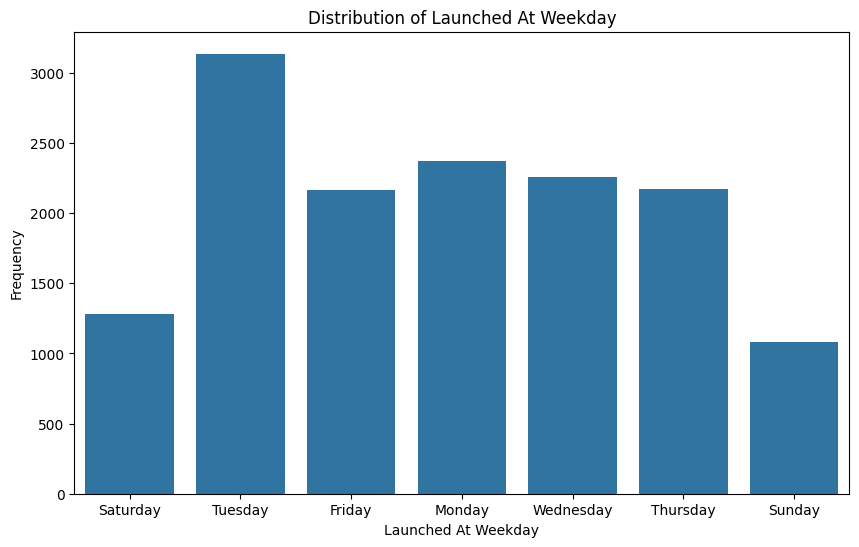

In [130]:
#create a plot of the distribution of launched at weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="launched_at_weekday")
plt.title("Distribution of Launched At Weekday")
plt.xlabel("Launched At Weekday")
plt.ylabel("Frequency")


Text(0, 0.5, 'Success Rate')

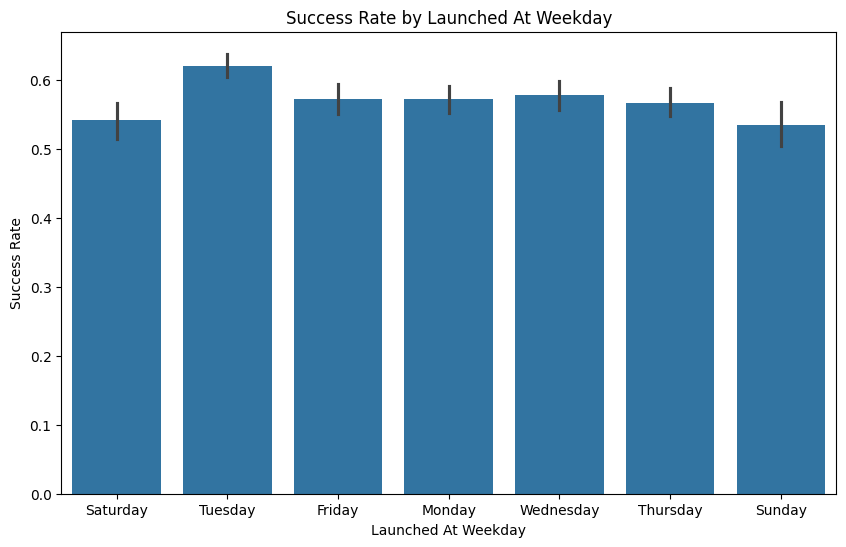

In [131]:
#create a barplot of the success rate by launched at weekday
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="launched_at_weekday", y="success")
plt.title("Success Rate by Launched At Weekday")
plt.xlabel("Launched At Weekday")
plt.ylabel("Success Rate")


In [149]:
#remove the country variable as it has too many categories
# #create a subset of the data corresponding to all of the categorical variables
categorical_data = data[['state', 'main_category', 'other_country', 'show_feature_image', 'video','deadline_weekday', 'launched_at_weekday']]

categorical_data = pd.get_dummies(categorical_data)
#remove the all of the launch dummies apprart from the lauched_at_weekday_Tuesday column
categorical_data = categorical_data.drop(columns = categorical_data.columns[categorical_data.columns.str.contains('launched_at_weekday') & ~categorical_data.columns.str.contains('launched_at_weekday_Tuesday')])
#remove the all of the deadline dummies apprart from the deadline_weekday_Thursday column
categorical_data = categorical_data.drop(columns = categorical_data.columns[categorical_data.columns.str.contains('deadline_weekday') & ~categorical_data.columns.str.contains('deadline_weekday_Thursday')])
categorical_data.columns


Index(['show_feature_image', 'video', 'state_failed', 'state_successful',
       'main_category_Art', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'other_country_AU', 'other_country_CA',
       'other_country_DE', 'other_country_ES', 'other_country_FR',
       'other_country_GB', 'other_country_HK', 'other_country_IT',
       'other_country_JP', 'other_country_MX', 'other_country_NL',
       'other_country_Other', 'other_country_SE', 'other_country_US',
       'deadline_weekday_Thursday', 'launched_at_weekday_Tuesday'],
      dtype='object')

<Axes: >

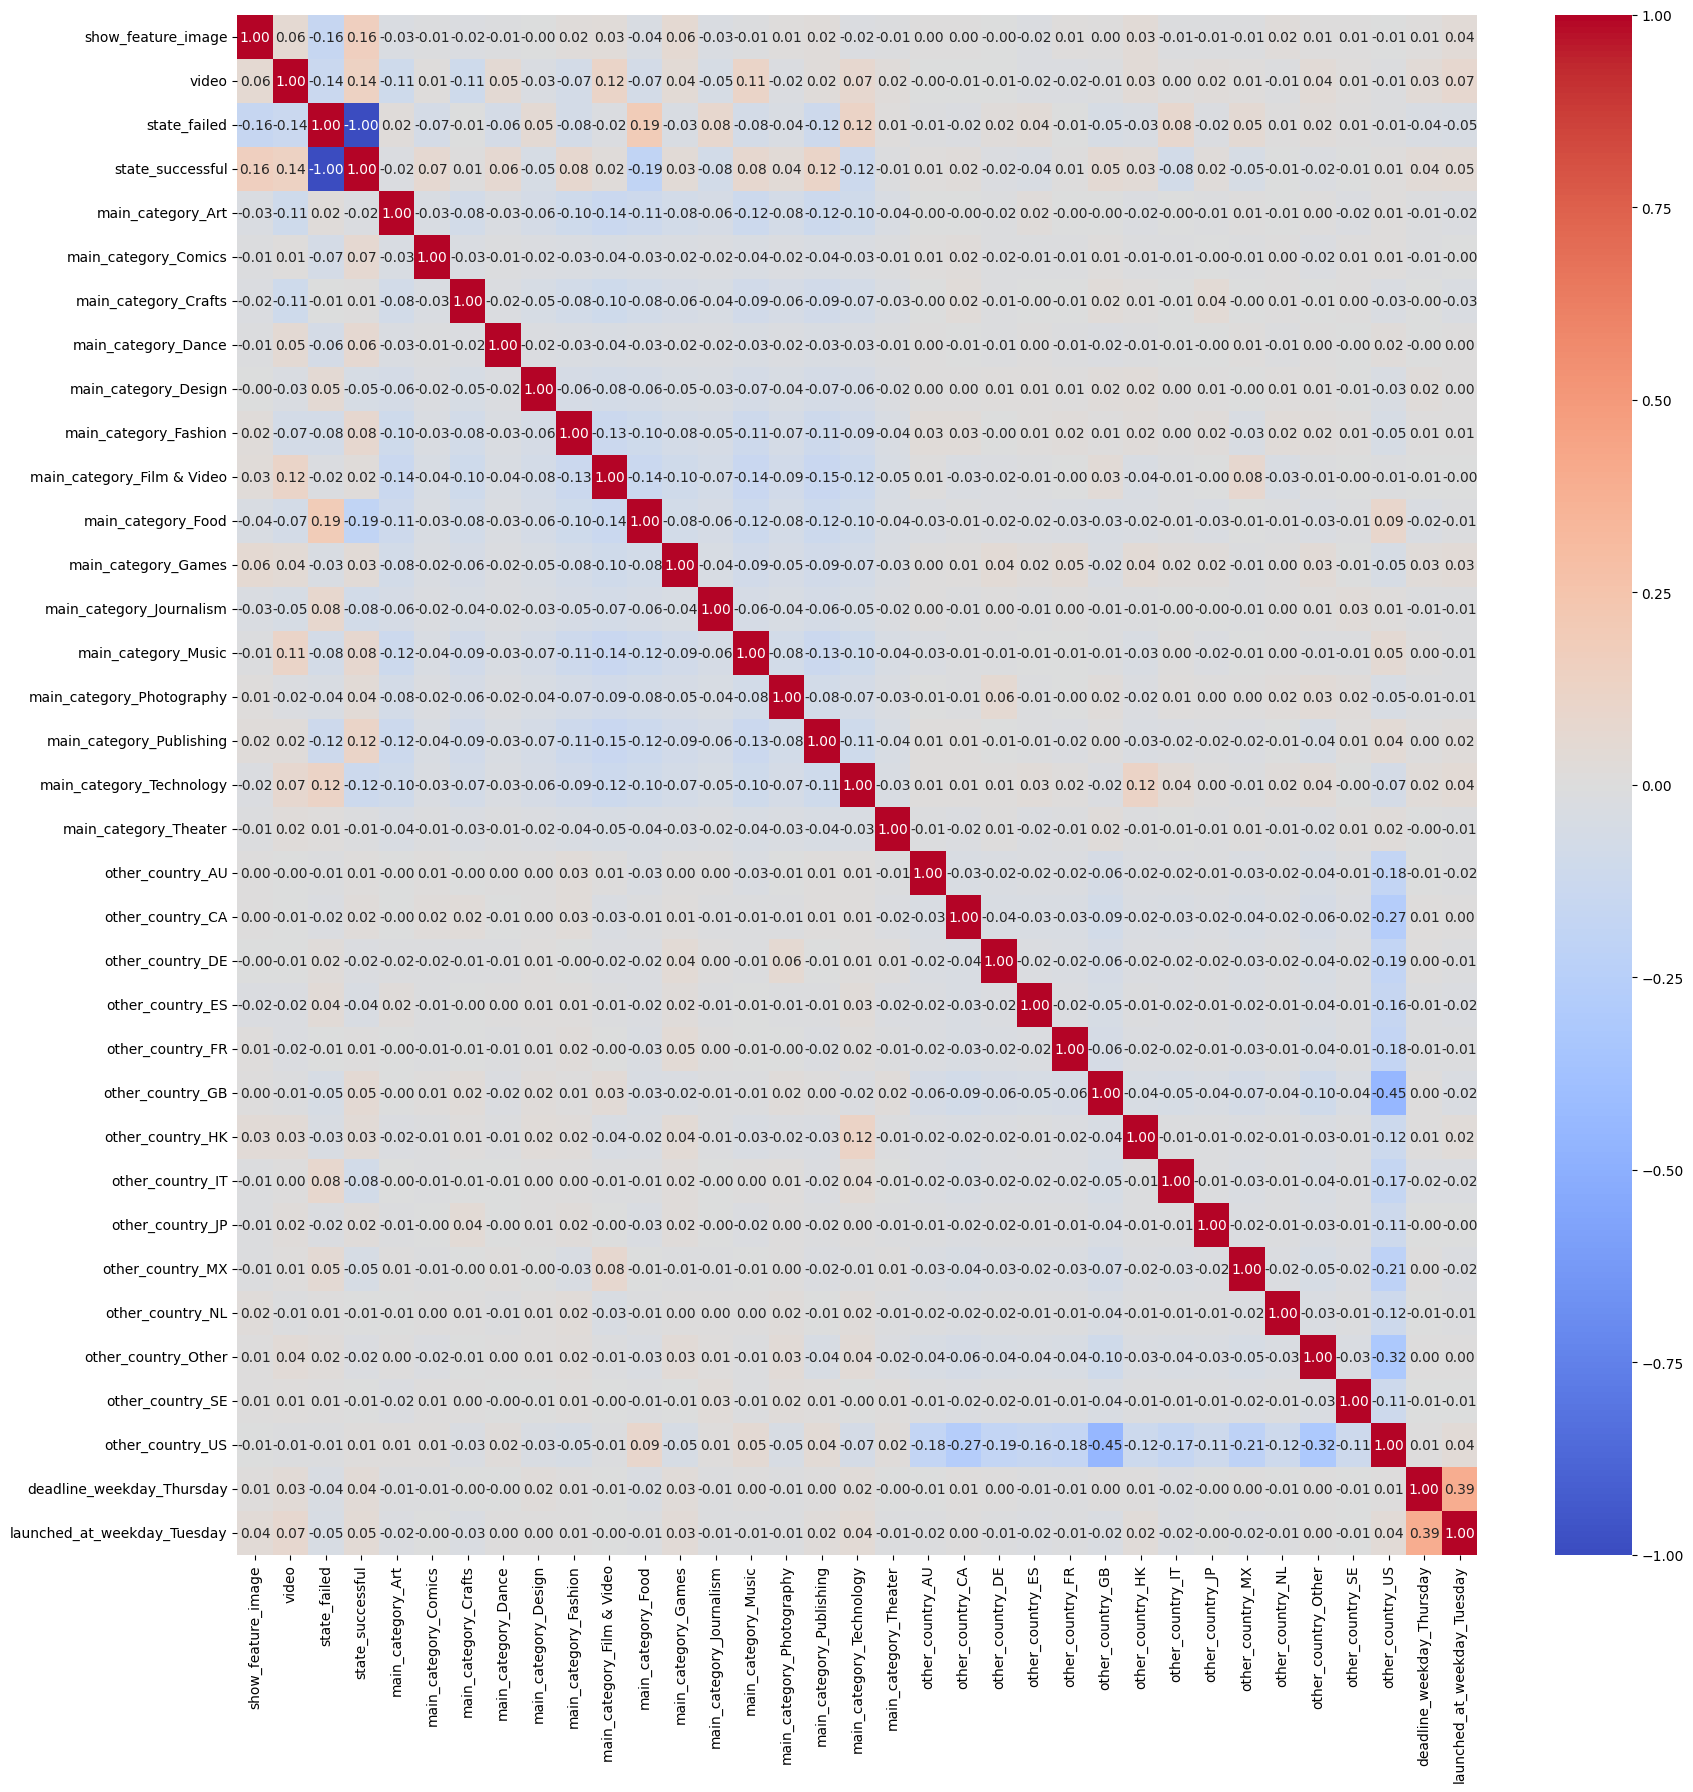

In [150]:
#create dummy variables for all of the categorical variables and create a correlation plot
correlation_matrix = categorical_data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")

<Axes: >

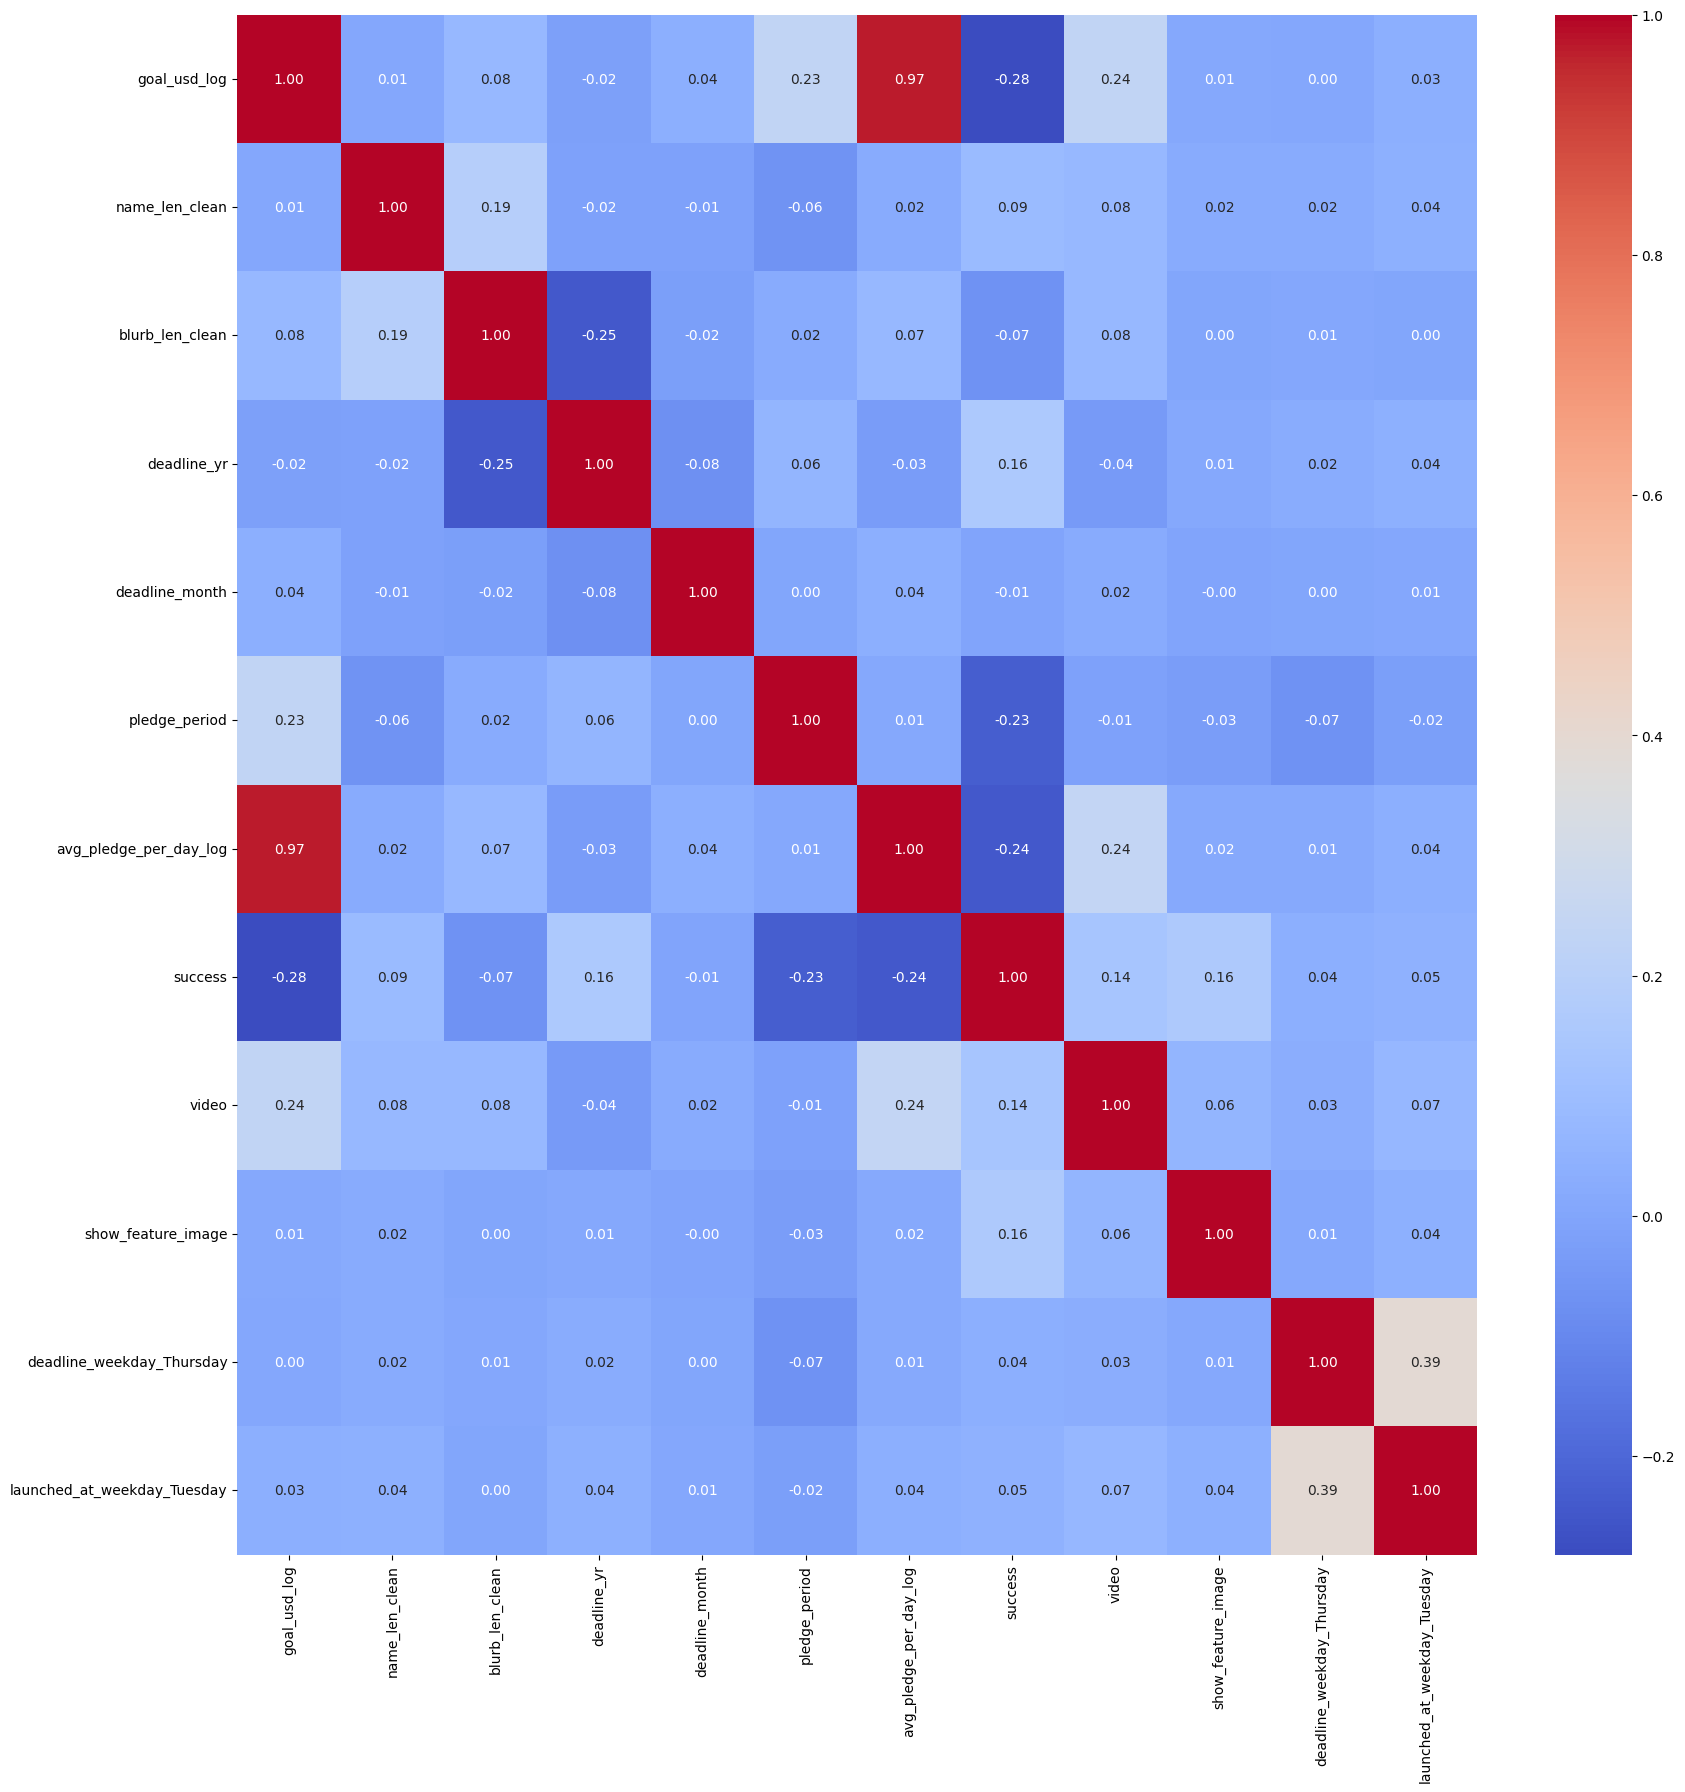

In [153]:
#show the correlaiton between video, phot, deadline on thursday and launch on tuesday with the numeric variables
#create a subset of the data corresponding to the numeric variables and the selected dummies
selected_dummies = ['video', 'show_feature_image', 'deadline_weekday_Thursday', 'launched_at_weekday_Tuesday']
data['deadline_weekday_Thursday'] = np.where(data['deadline_weekday'] == 'Thursday', 1, 0)
data['launched_at_weekday_Tuesday'] = np.where(data['launched_at_weekday'] == 'Tuesday', 1, 0)

selected_data = data[['goal_usd_log', 'name_len_clean', 'blurb_len_clean', 'deadline_yr', 'deadline_month', 'pledge_period', 'avg_pledge_per_day_log', 'success'] + selected_dummies]

correlation_matrix = selected_data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")

<Axes: >

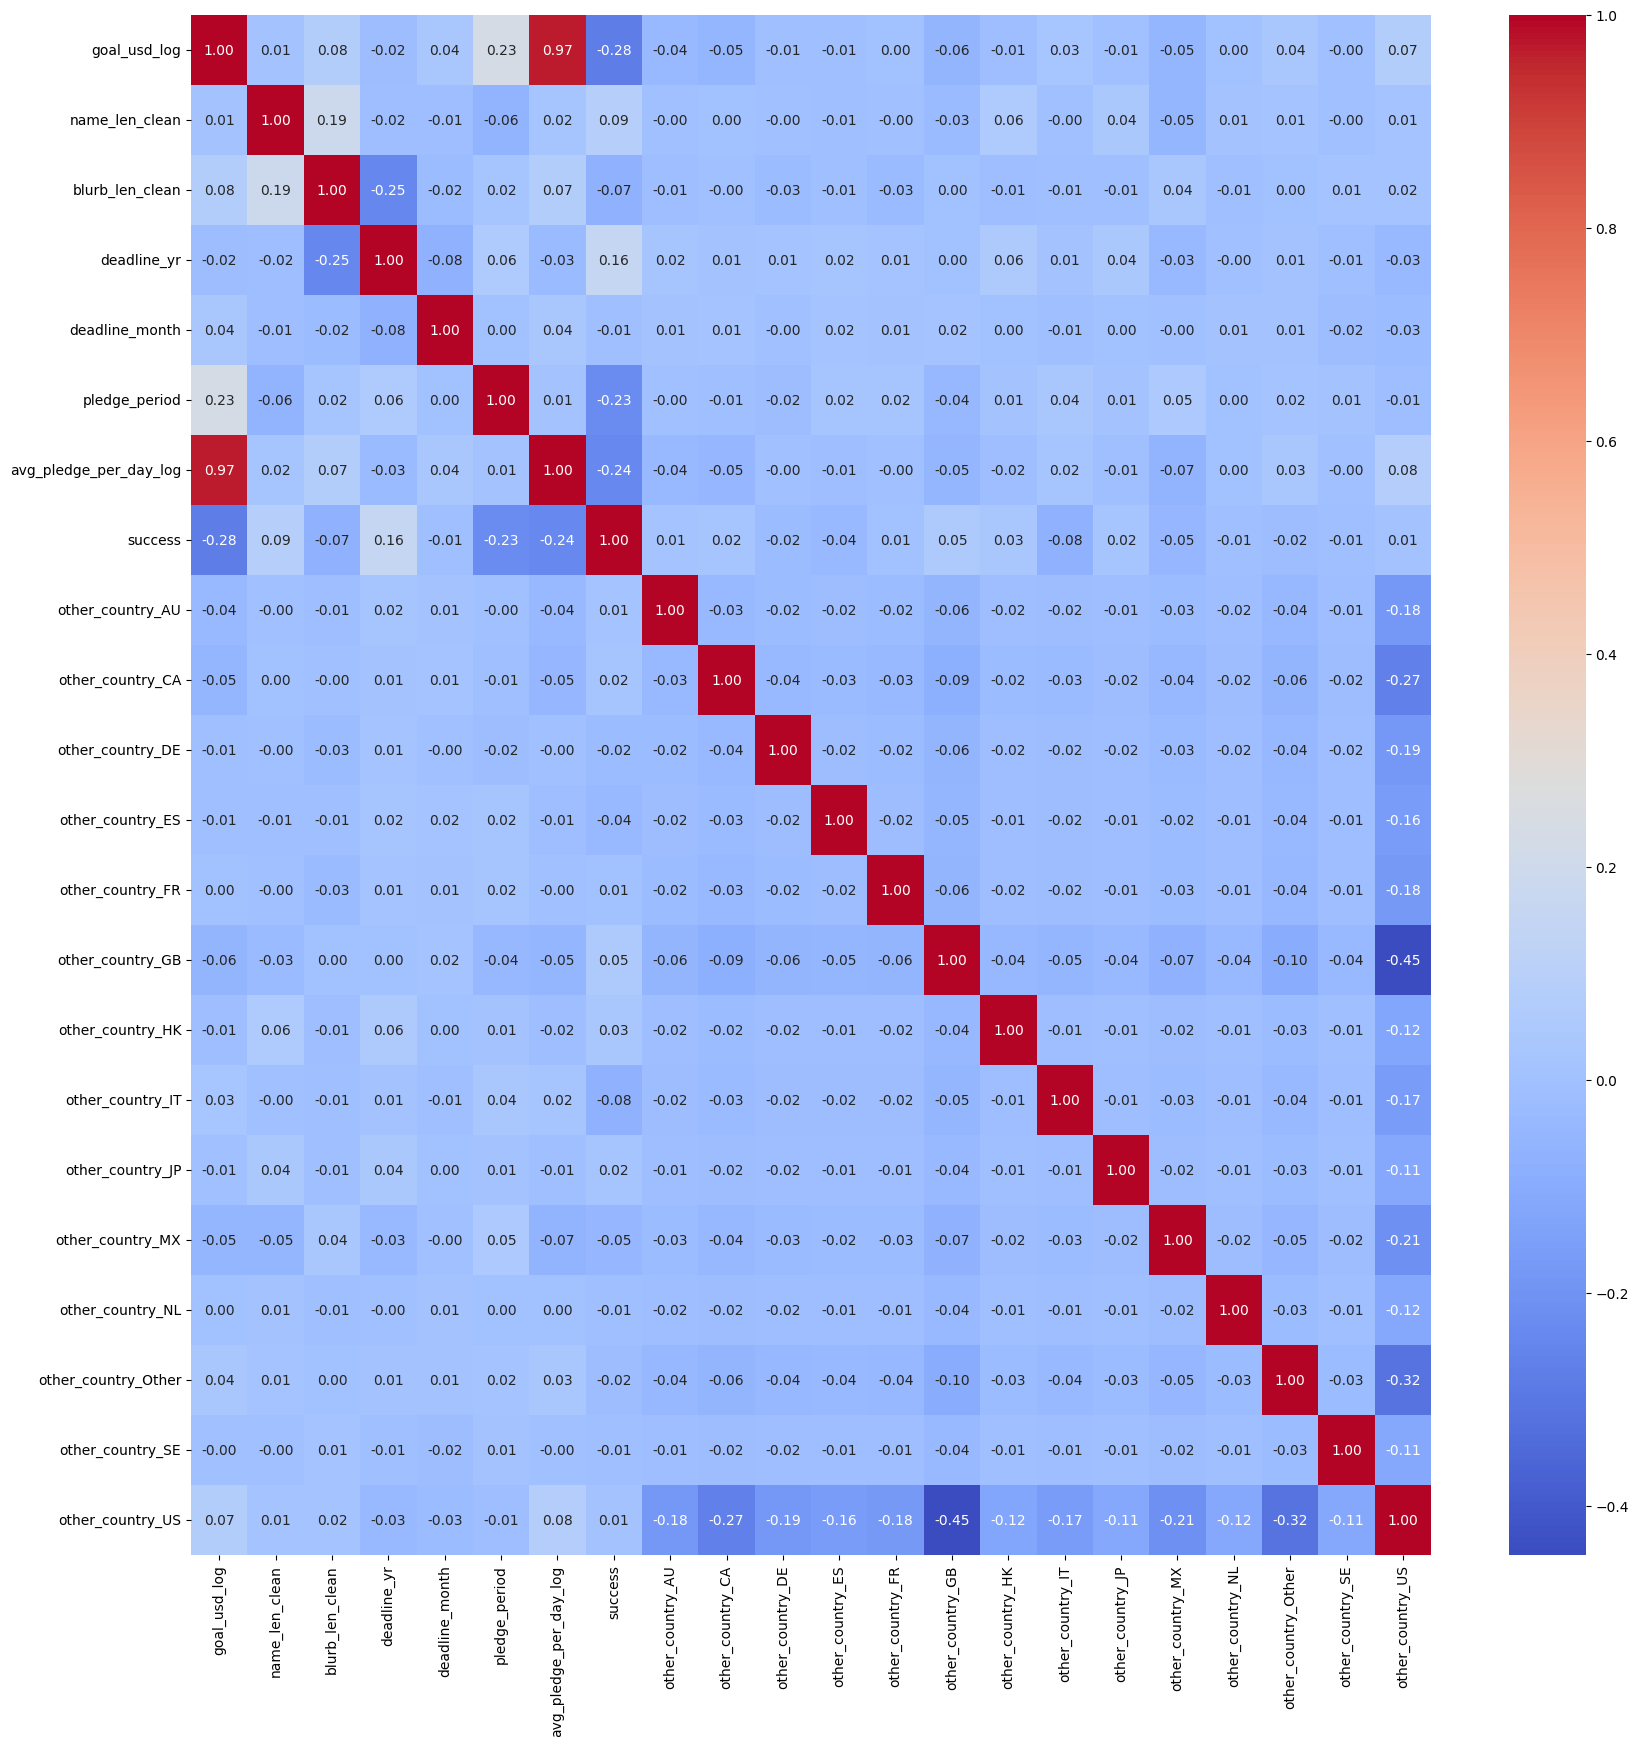

In [163]:
#select the dummies and the numeric variables
selected_dummies = data.columns[data.columns.str.contains('other_country')].tolist()
columns = ['goal_usd_log', 'name_len_clean', 'blurb_len_clean', 'deadline_yr', 'deadline_month', 'pledge_period', 'avg_pledge_per_day_log', 'success'] + selected_dummies
selected_data = data[columns] 

correlation_matrix = selected_data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")


Now that we have seen all of the data, we will select the following variables as our predictors. For the numeric variables we have goal_usd_log, name_len_cleaned, blurb_len, deadline_yr, pledge_period, avg_pledge_per_day as well as all of the levels for the categorical variables, appart for the weekday variables where we have tuesday for launch and thursday for deadline.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24288\275738882.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['usd_pledged'], kde = False, bins = 100)


Text(0, 0.5, 'Frequency')

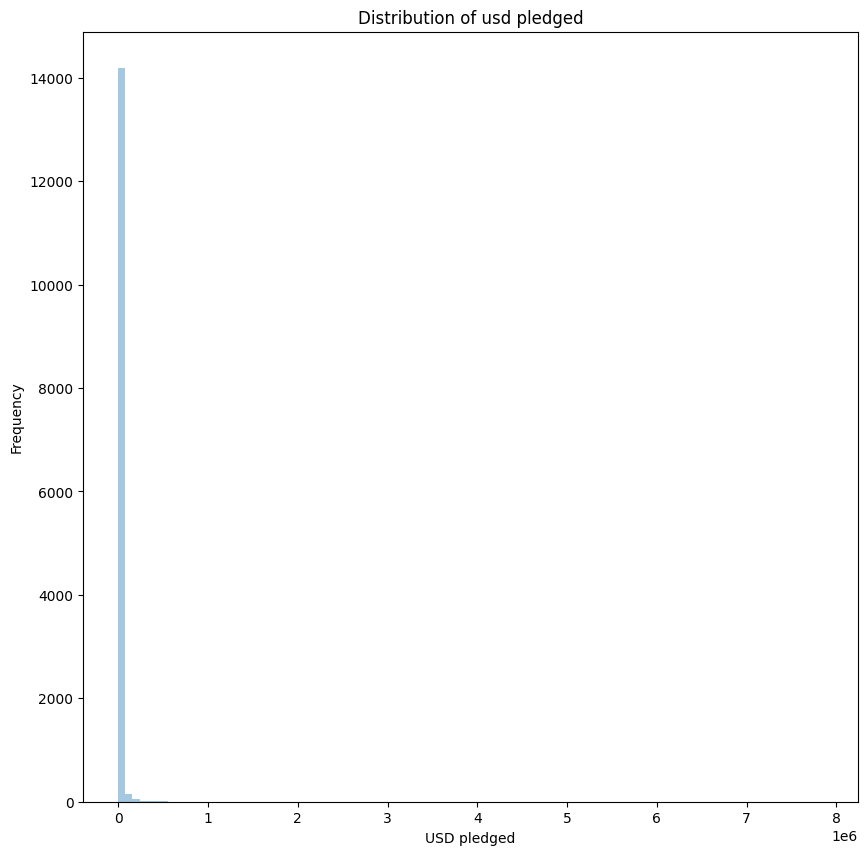

In [165]:
# get a plot of the distribution of the usd pledged
plt.figure(figsize = (10, 10))
sns.distplot(data['usd_pledged'], kde = False, bins = 100)
plt.title('Distribution of usd pledged')
plt.xlabel('USD pledged')
plt.ylabel('Frequency')


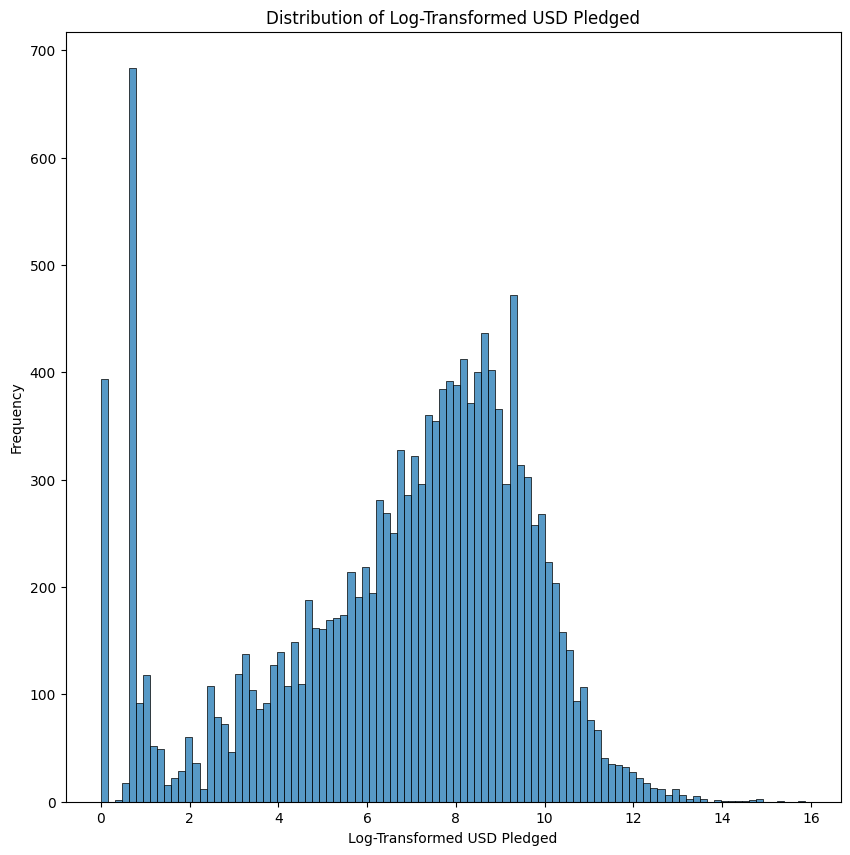

In [167]:
# Log transform the 'usd_pledged' column
data['usd_pledged_log'] = np.log(data['usd_pledged'] + 1)  # Adding 1 to avoid log(0)

# Plot the distribution of the log-transformed 'usd_pledged'
plt.figure(figsize=(10, 10))
sns.histplot(data['usd_pledged_log'], kde=False, bins=100)
plt.title('Distribution of Log-Transformed USD Pledged')
plt.xlabel('Log-Transformed USD Pledged')
plt.ylabel('Frequency')
plt.show()

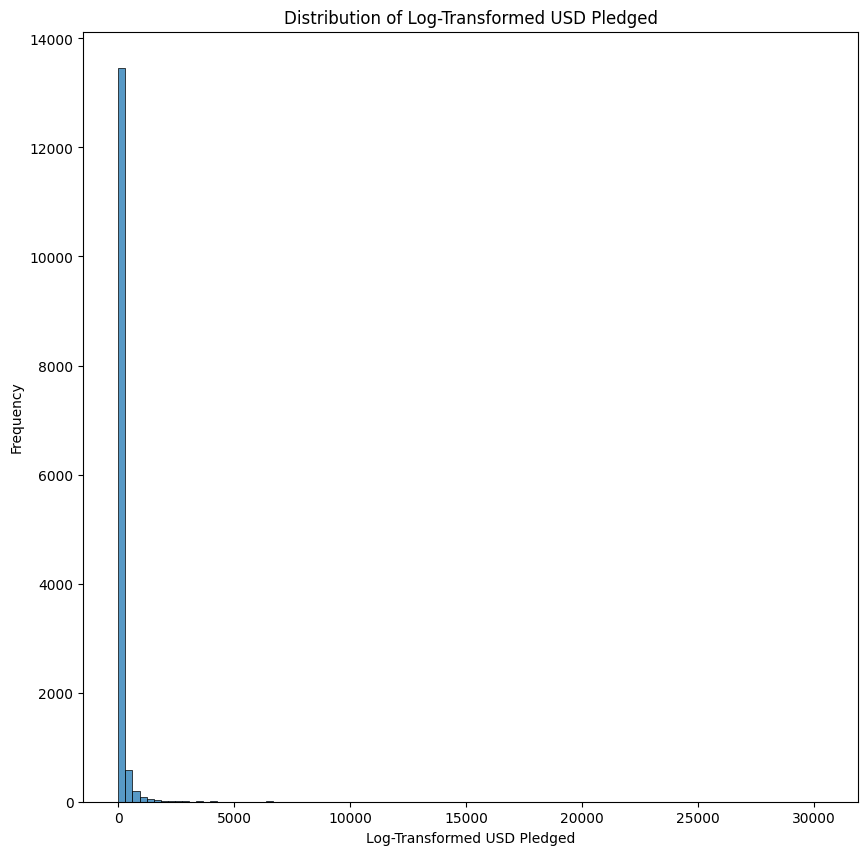

In [168]:
#get a plot of the distribution of backers count
plt.figure(figsize=(10, 10))
sns.histplot(data['backers_count'], kde=False, bins=100)
plt.title('Distribution of Log-Transformed USD Pledged')
plt.xlabel('Log-Transformed USD Pledged')
plt.ylabel('Frequency')
plt.show()

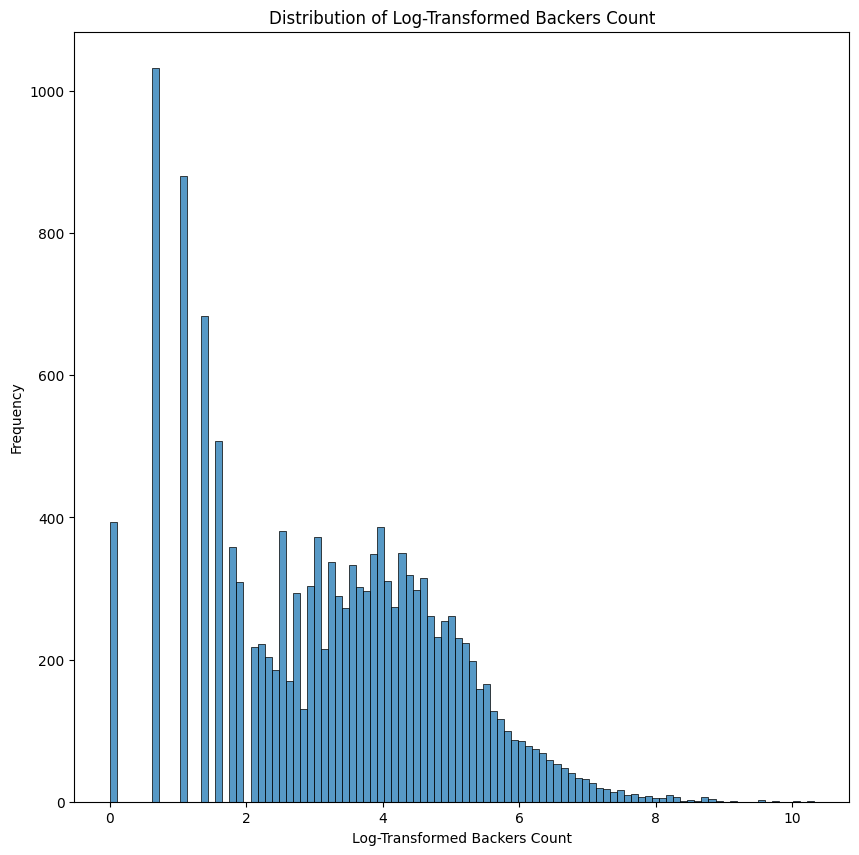

In [169]:
# Log transform the 'backers_count' column
data['backers_count_log'] = np.log(data['backers_count'] + 1)  # Adding 1 to avoid log(0)

# Plot the distribution of the log-transformed 'backers_count'
plt.figure(figsize=(10, 10))
sns.histplot(data['backers_count_log'], kde=False, bins=100)
plt.title('Distribution of Log-Transformed Backers Count')
plt.xlabel('Log-Transformed Backers Count')
plt.ylabel('Frequency')
plt.show()

<Axes: >

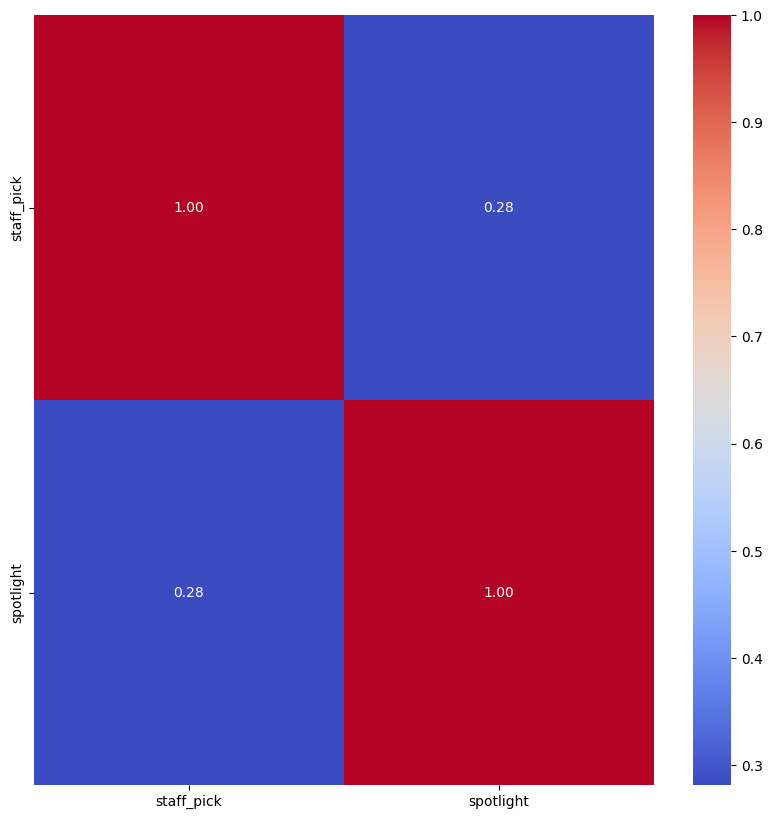

In [8]:
#get a correlation plot for staff pick and spotlight
selected_dummies = ['staff_pick', 'spotlight']
data['staff_pick'] = np.where(data['staff_pick'] == True, 1, 0)
data['spotlight'] = np.where(data['spotlight'] == True, 1, 0)

selected_data = data[selected_dummies]

correlation_matrix = selected_data.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")
